# Visualization with libraries
Review: 
- variables
- variable type (and question) will determine the plot
- examined some common exploratory plots without code

This module: 
- We have played with libraries and so can now use them to plot the data.
- We are going to reference the dataset and examples from here: https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/data/df_for_viz.csv
- We will spend our time modifying arguments of plotting functions to see the resulting difference in visualizations!

In [1]:
# common stack in Python for visualizing data
# import working with data libraries
import pandas as pd
import numpy as np

# import seaborn
import seaborn as sns
#https://seaborn.pydata.org/tutorial/color_palettes.html

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

(843, 11)
   gender          lecture_attendance job  statistics  programming  Java  \
0  female  I prefer to attend lecture  No           5            8     1   
1    male  I prefer to attend lecture  No           8            4     0   
2  female  I prefer to attend lecture  No           6            7     1   
3    male  I prefer to attend lecture  No           2           10     1   

   MATLAB  R  Python  C  SQL  
0       0  0       0  0    0  
1       1  0       1  0    0  
2       0  0       0  0    0  
3       0  0       0  1    0  
       statistics  programming        Java      MATLAB           R  \
count  843.000000   843.000000  843.000000  843.000000  843.000000   
mean     5.575326     6.769870    0.809015    0.265718    0.153025   
std      1.985687     2.367976    0.393310    0.441977    0.360225   
min      1.000000     1.000000    0.000000    0.000000    0.000000   
25%      4.000000     5.000000    1.000000    0.000000    0.000000   
50%      6.000000     7.000000    

<Axes: >

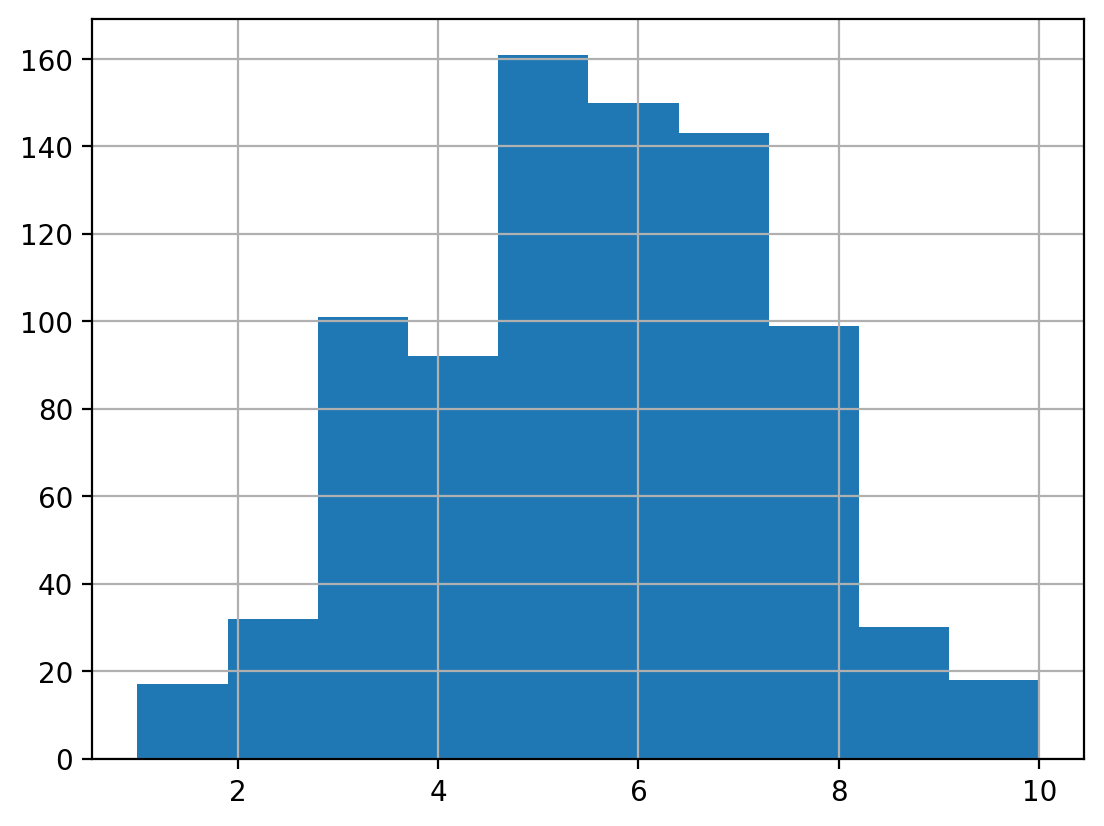

In [3]:
df = pd.read_csv('https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/data/df_for_viz.csv')
#let's see some attributes
print(df.shape)
print(df.head(4))
print(df.describe())
df['statistics'].hist()

<Axes: xlabel='statistics', ylabel='Count'>

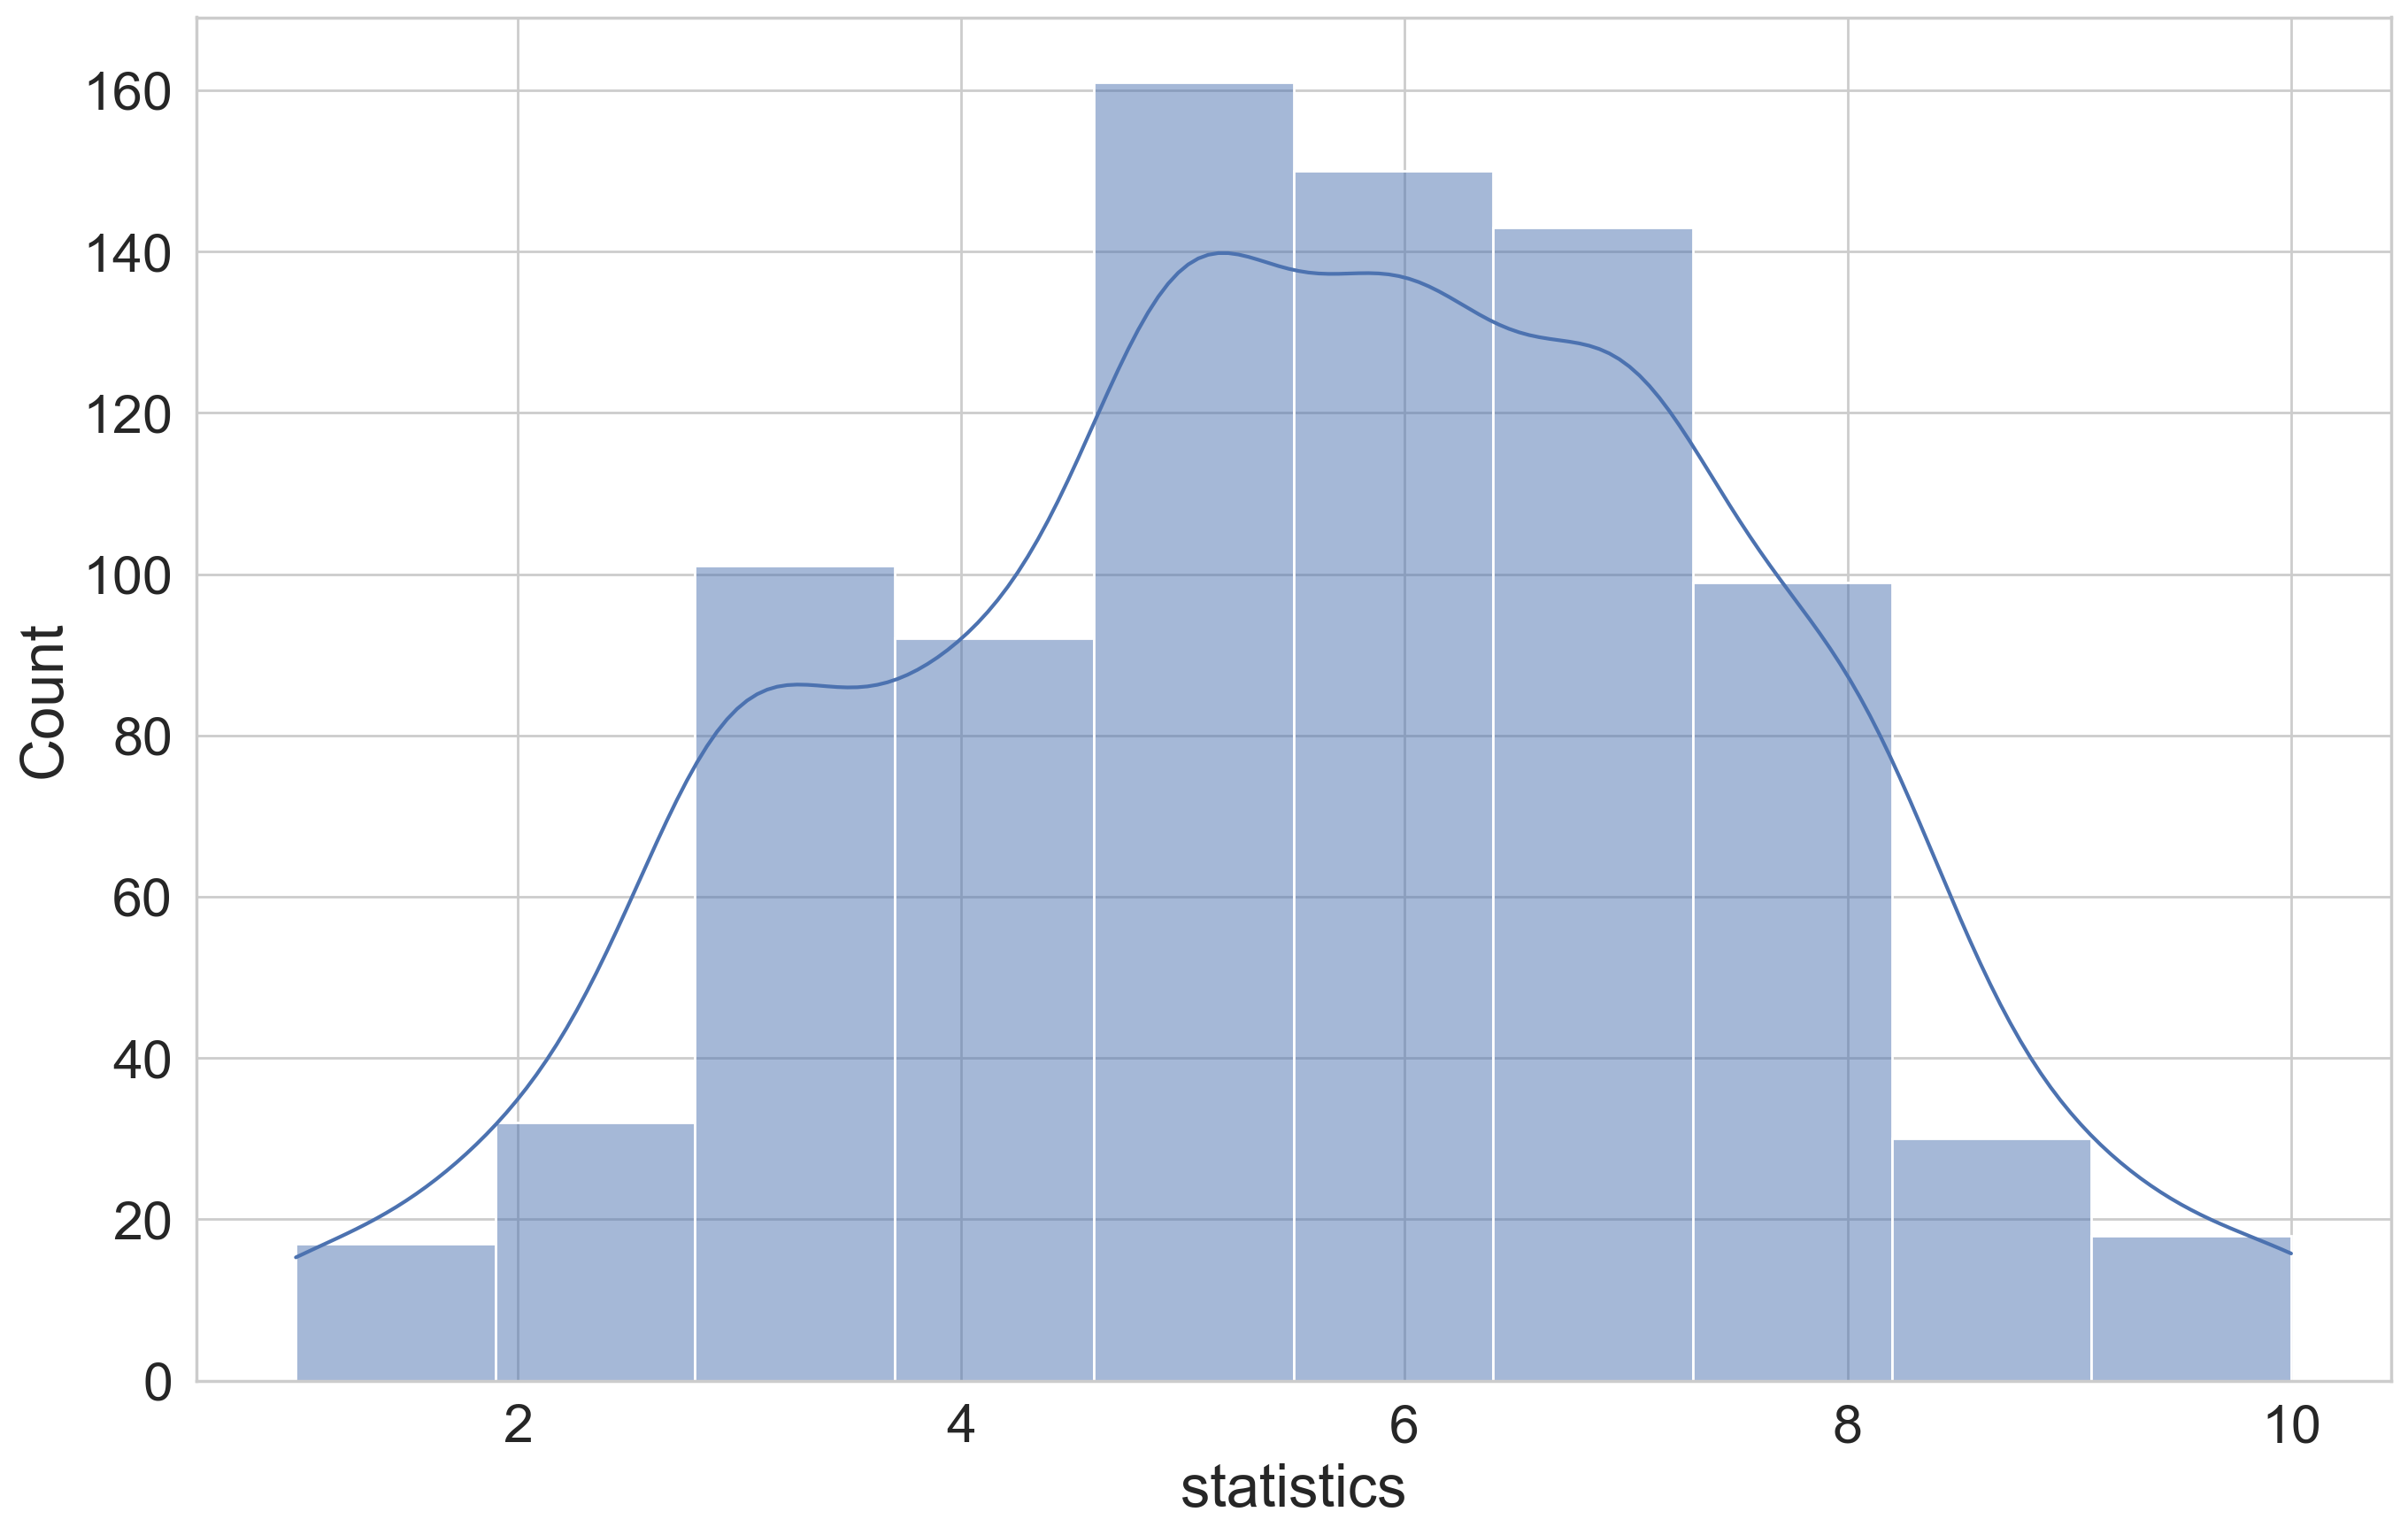

In [ ]:
#histograms using seaborn histograms
# set plotting size parameter
plt.rcParams['figure.figsize'] = (16,10) # plot size to output
# effects the style of display
sns.set_theme(context='notebook', # also try “paper”, “talk”, and “poster”
              style='whitegrid', # also try 'dark', 'white', and 'whitegrid'
              font_scale=2)
# histogram
#`distplot` in older versions of `seaborn`
# optional arguments: 
#    bins (defaults to auto bin selection), 
#    kde (defaults False)
sns.histplot(df['statistics'], bins=10, kde=True) # kernel density estimation

This doesn't follow "visualization best practices."

Question #1
Consider what are some positive and some negative aspects of the visualization above.


I'll ask for people to share in class what they are thinking after you have some time to think

# Visualization Best Practices
1. Choose the right type of visualization
2. Be mindful when choosing colors
3. Label your axes
4. Make text big enough
5. Keep it simple:
    - Aim to improve your data:ink ratio (and Edward Tufte beloved principle)
    - Everything on the page should serve a purpose. If it doesn't, remove it.


Text(0.5, 0, 'How comfortable are you with statistics?')

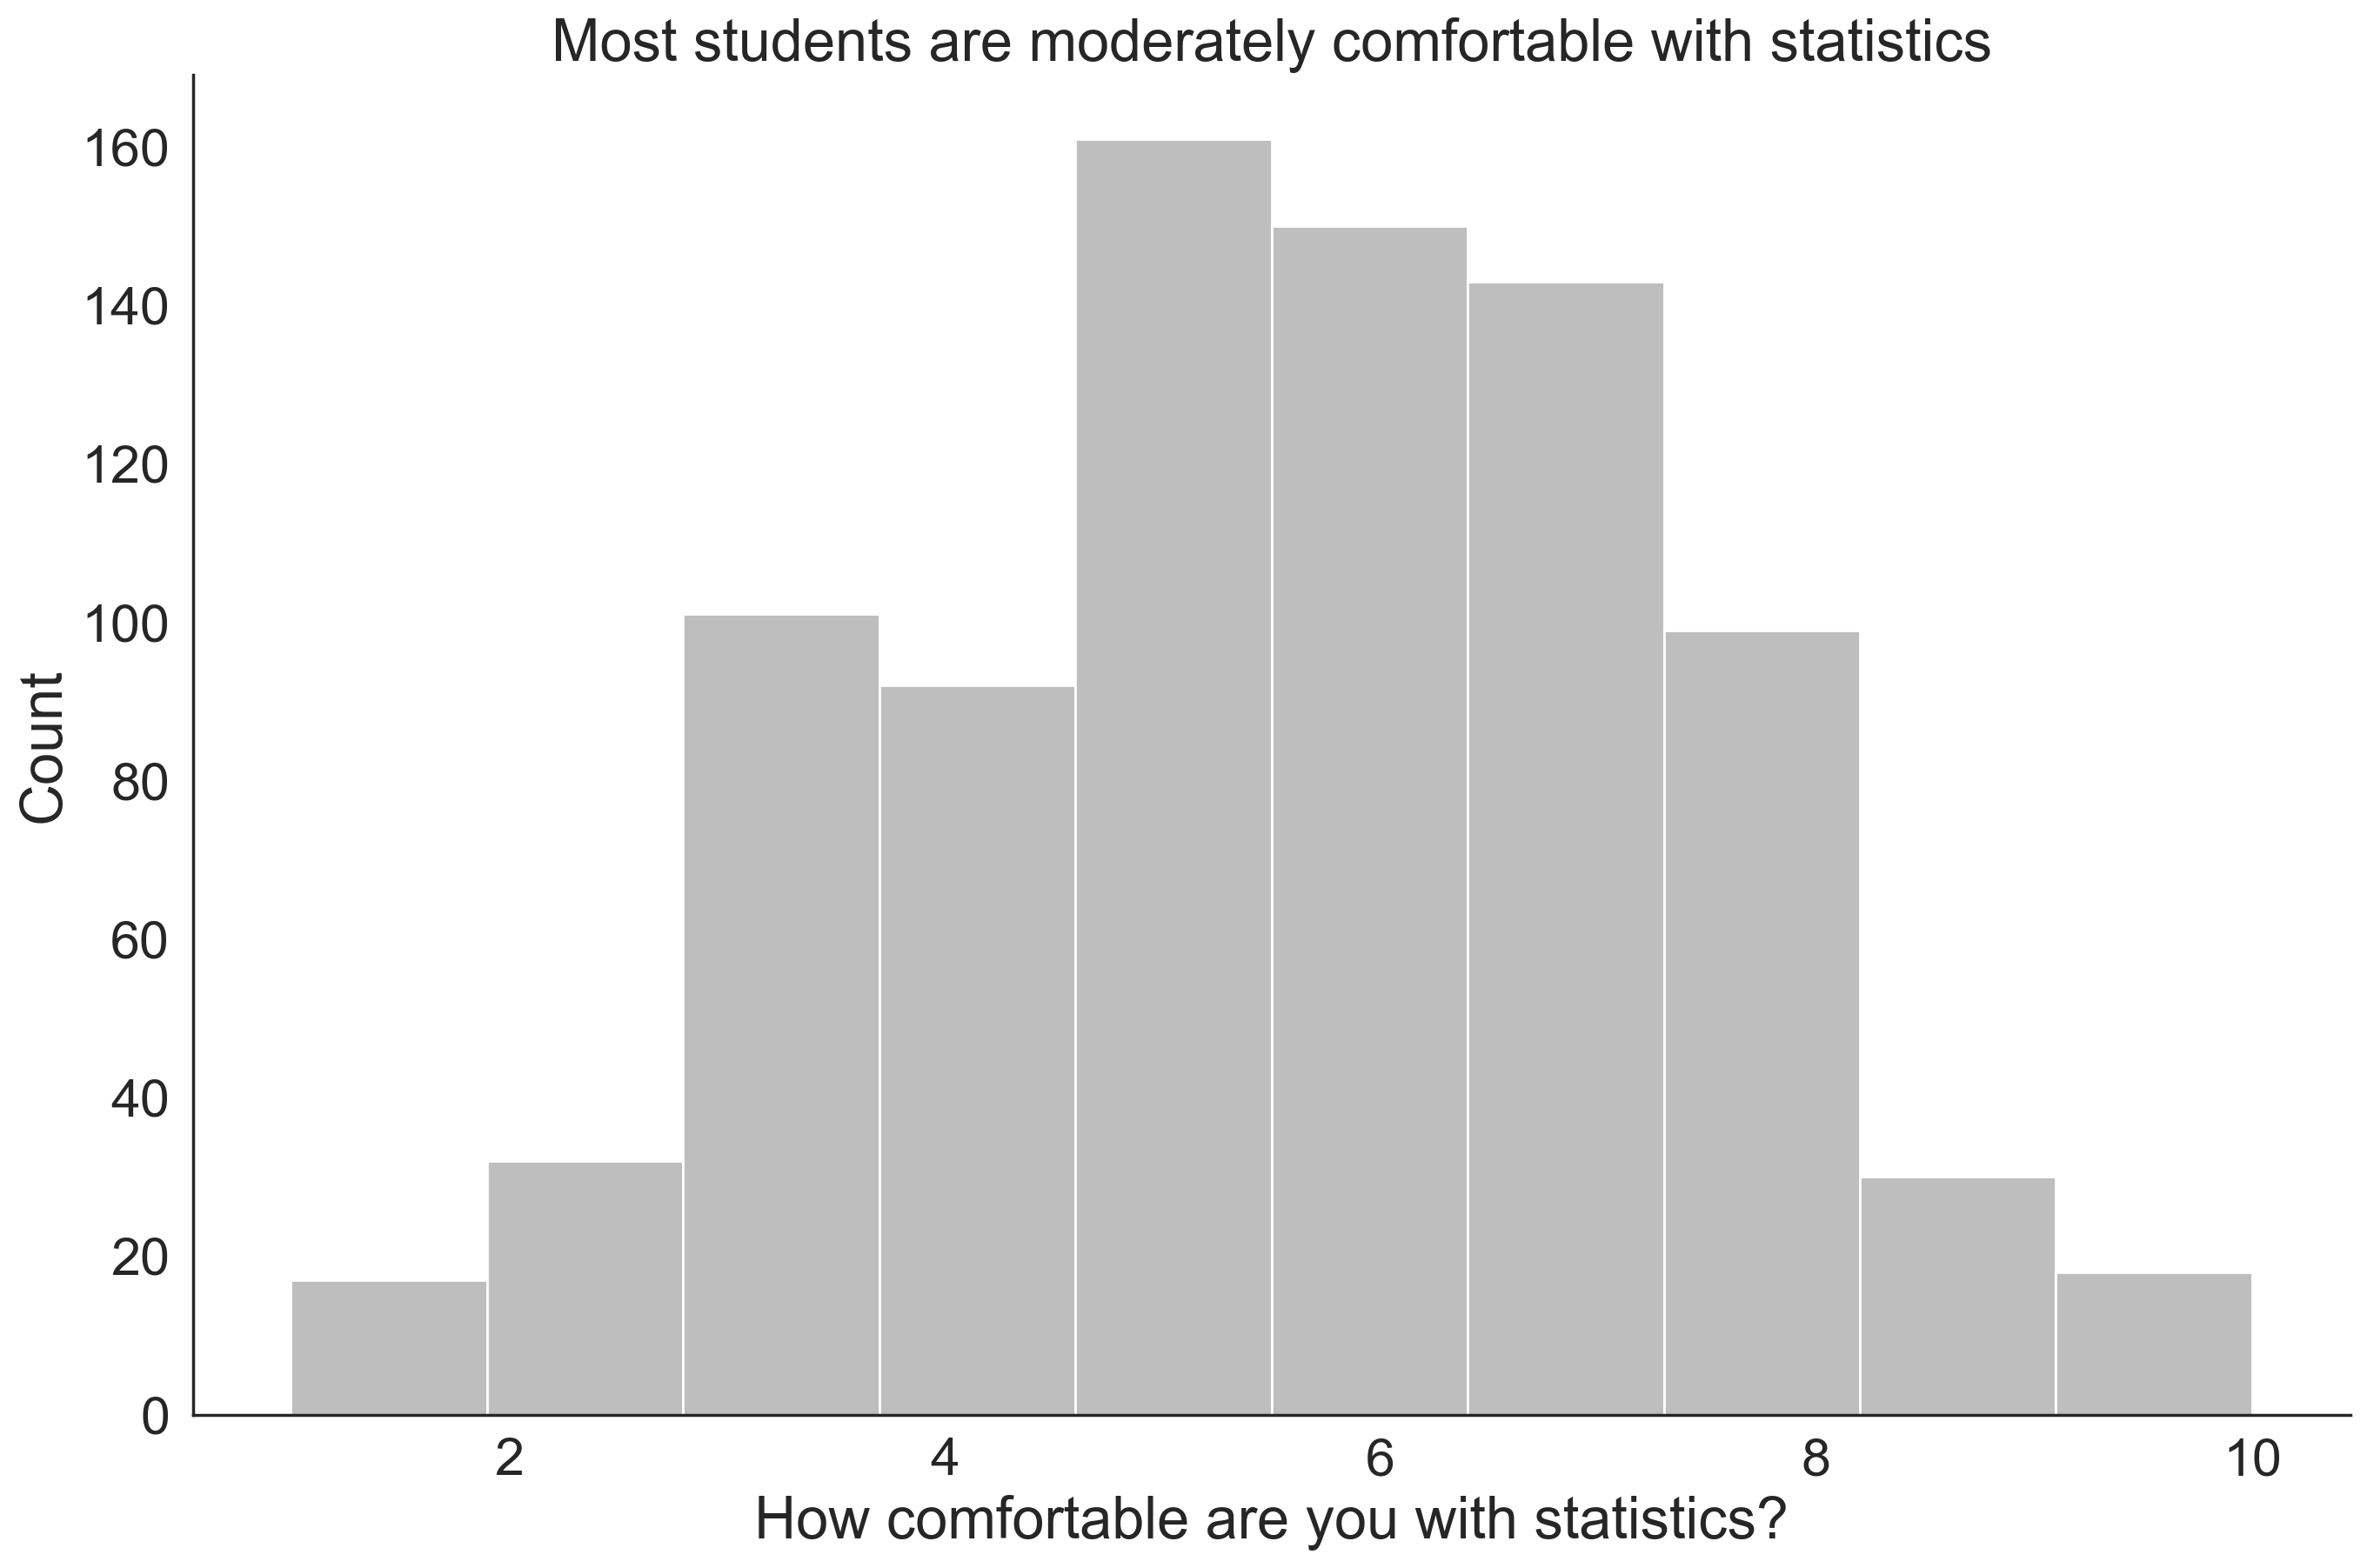

In [4]:
# This example is pulled from the same place where I got the dataset!
# we'll simplify the above chart: 
# change background to white without grid
# make bar color dark grey
sns.set_theme(style='white', font_scale=2)

ax = sns.histplot(df['statistics'],  
                  bins=10, color='darkgrey', kde=False)
# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most students are moderately comfortable with statistics')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with statistics?')

Text(0.5, 0, 'How comfortable are you with programming?')

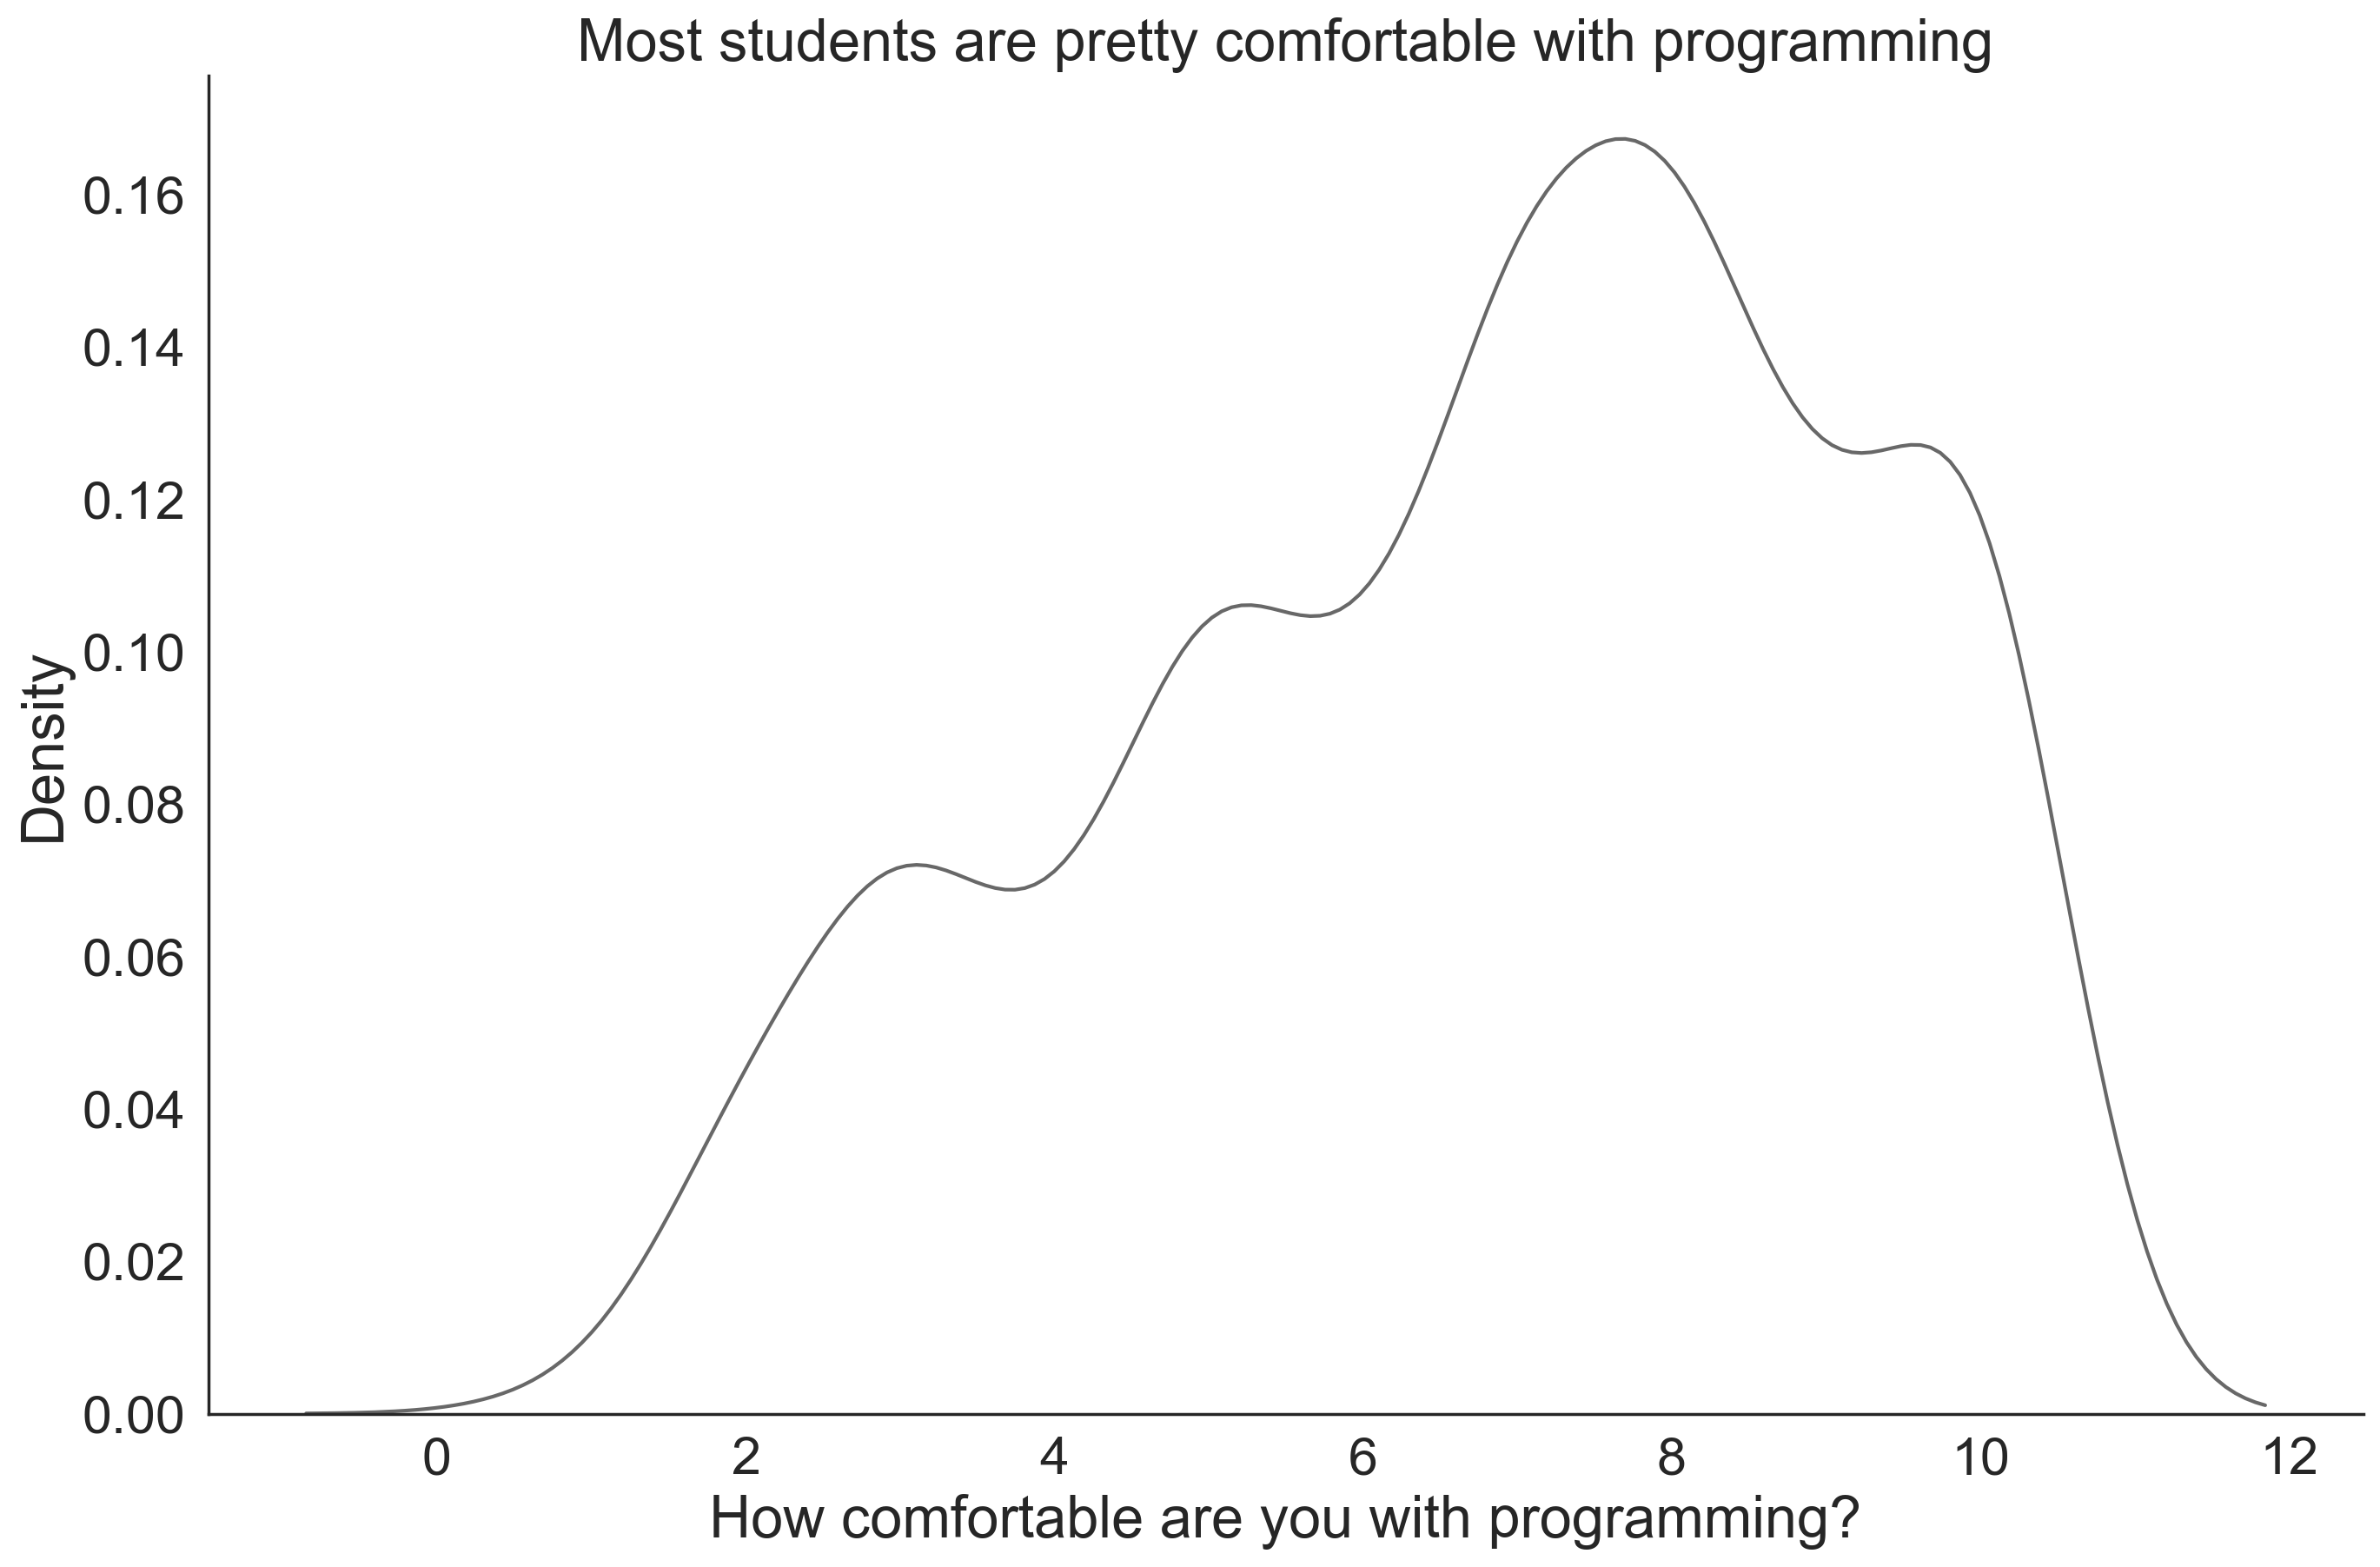

In [5]:
# kdeplot to only display the densityplot
ax = sns.kdeplot(df['programming'], color='#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most students are pretty comfortable with programming')
ax.set_ylabel('Density')
ax.set_xlabel('How comfortable are you with programming?')

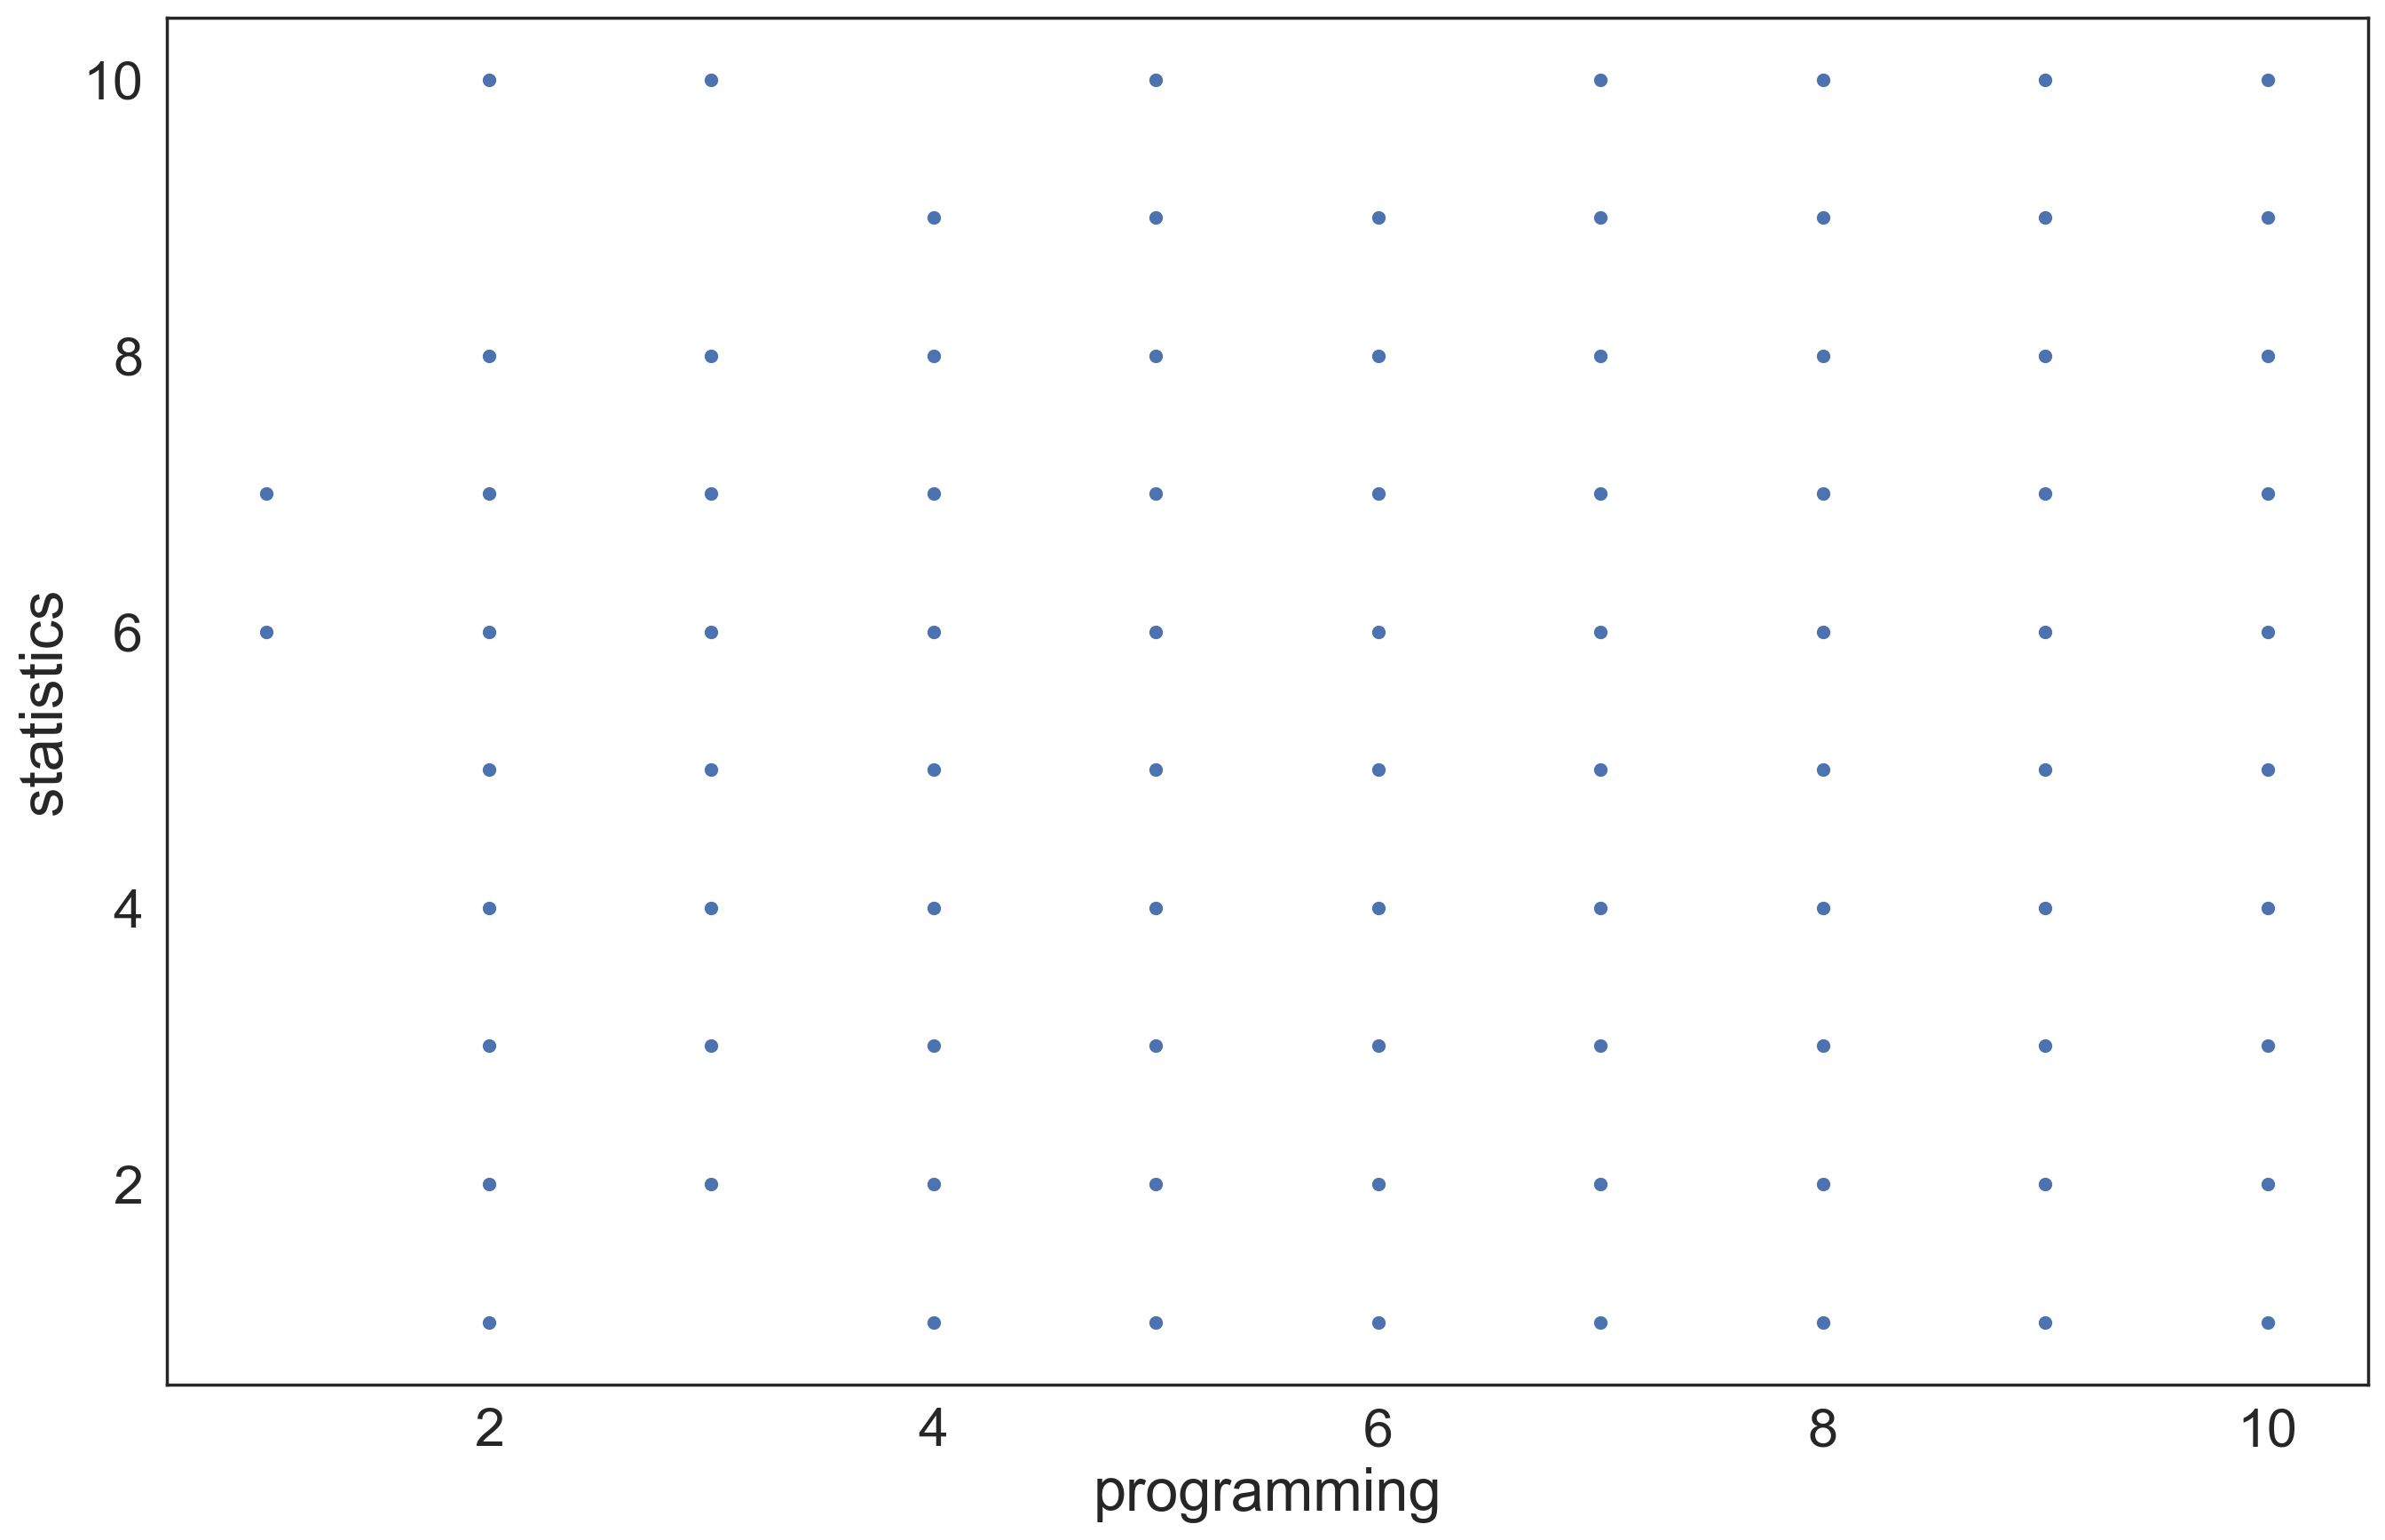

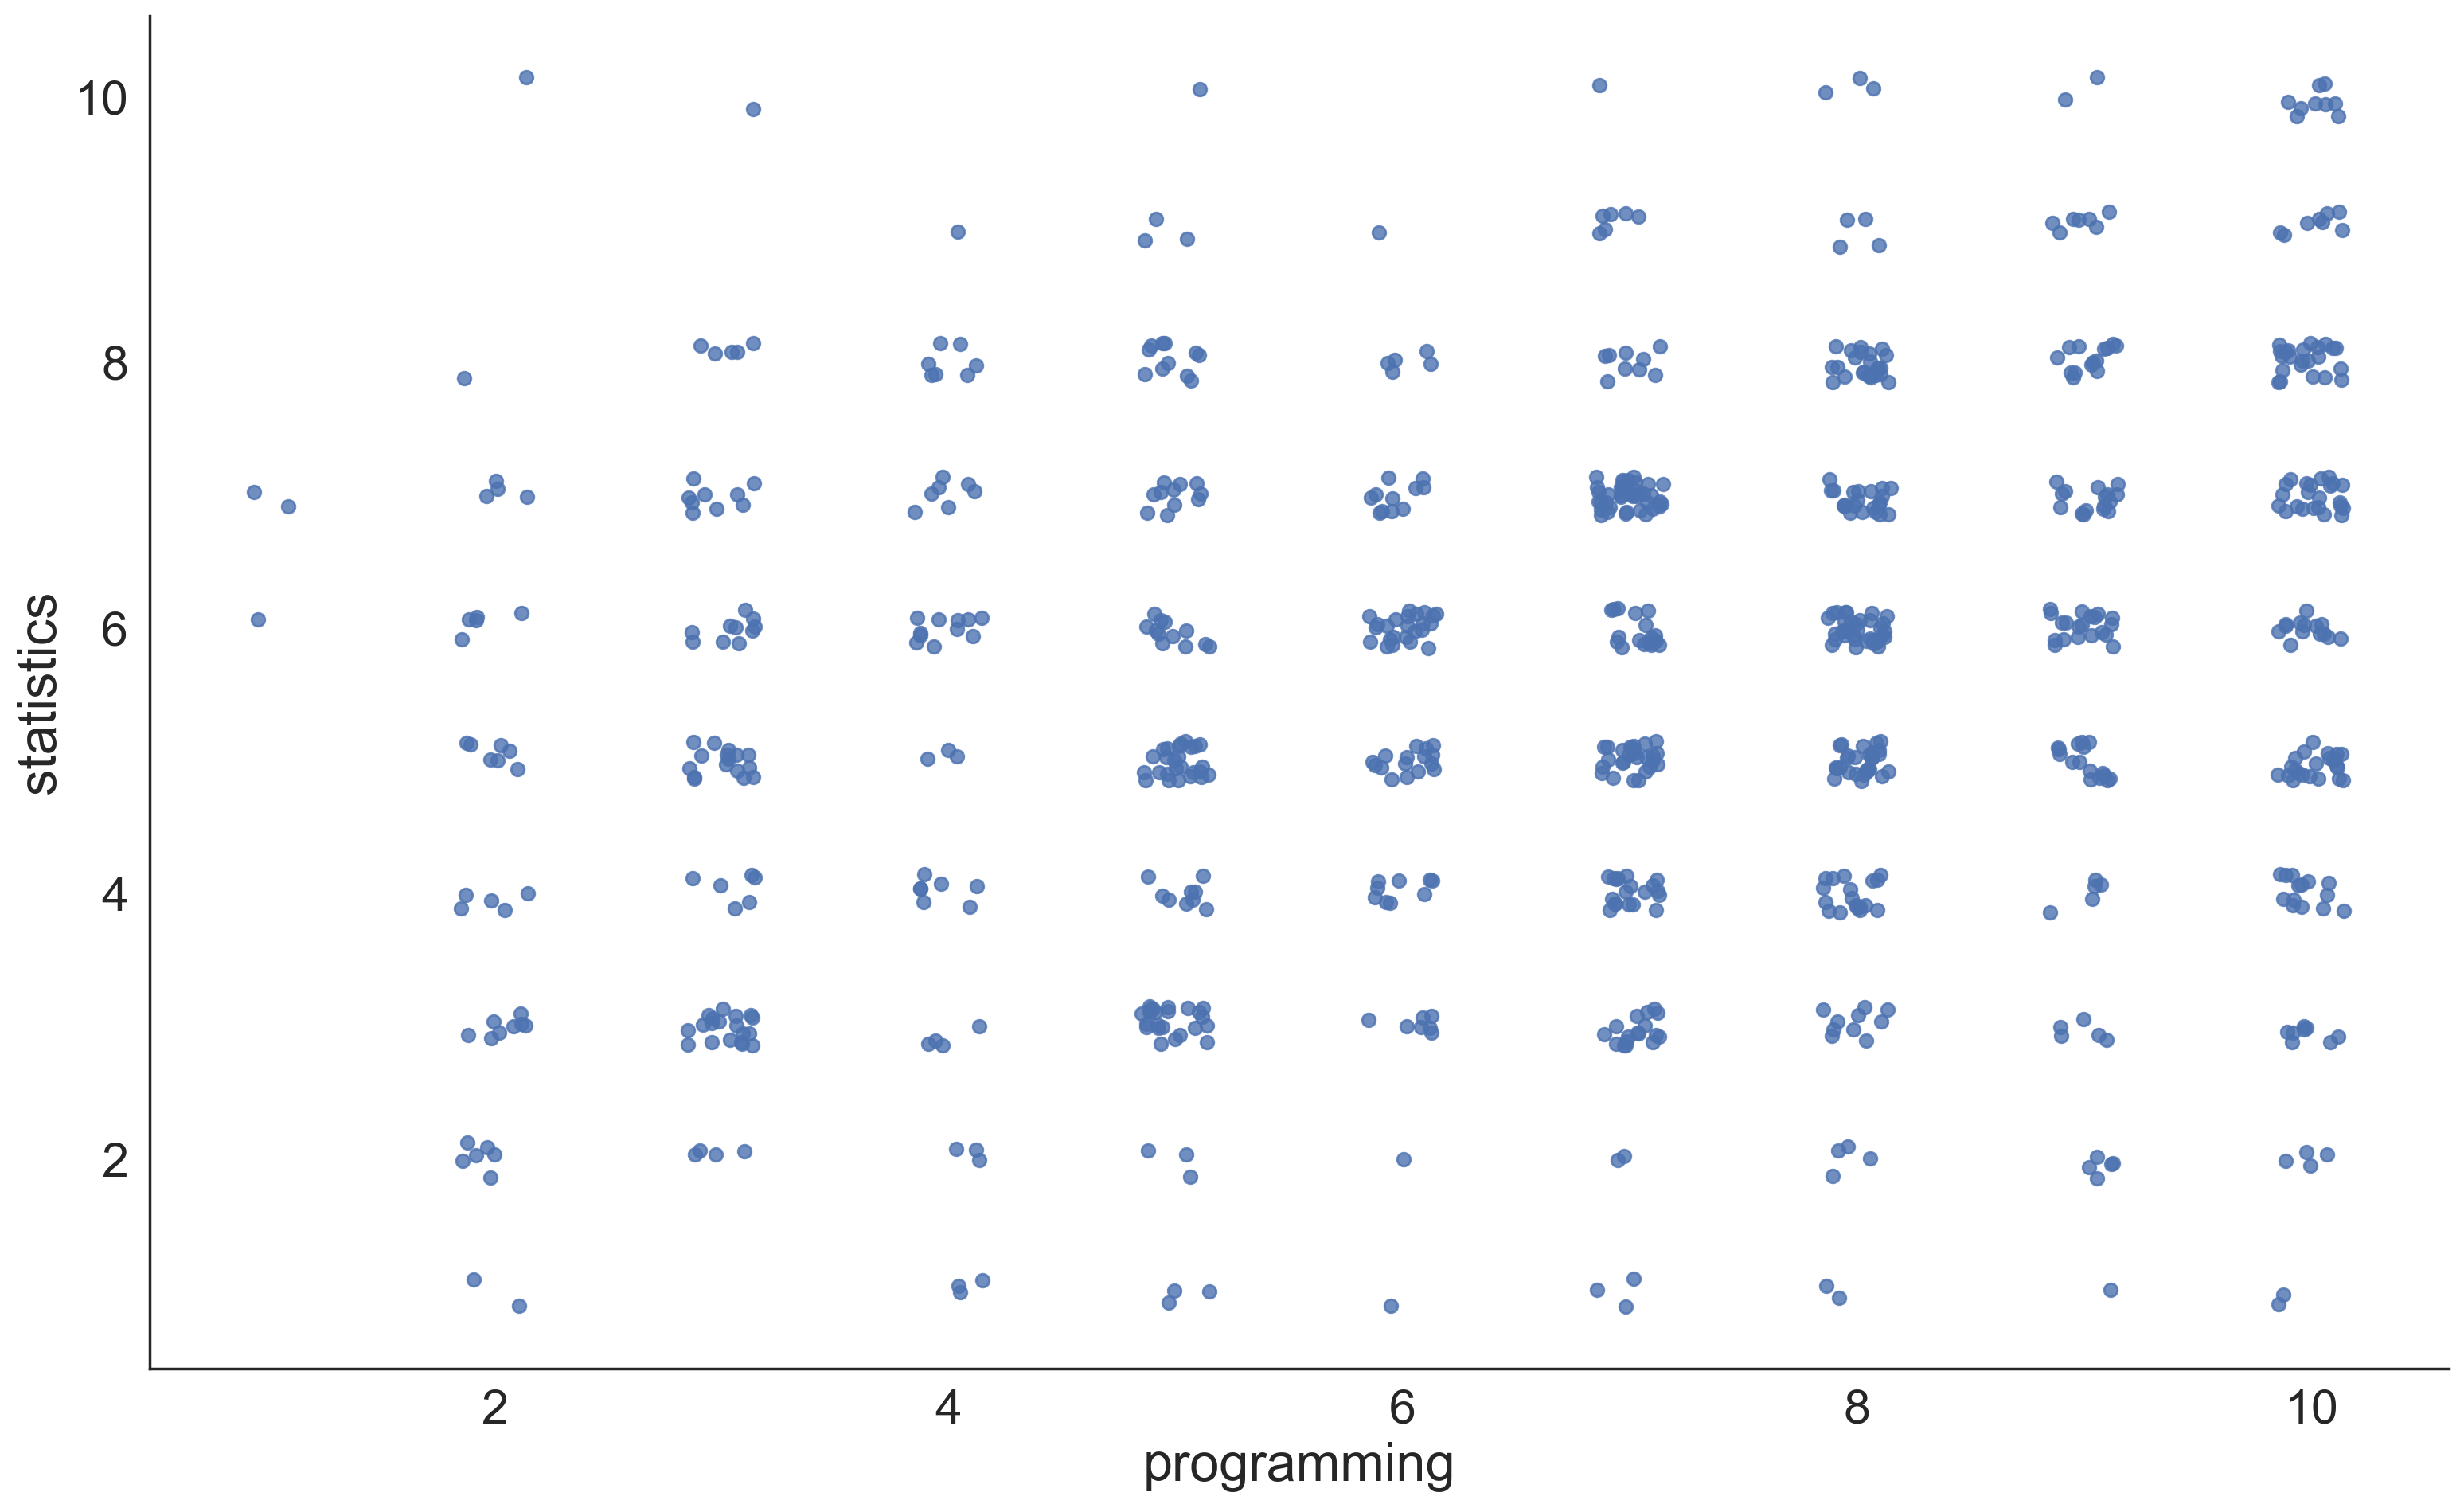

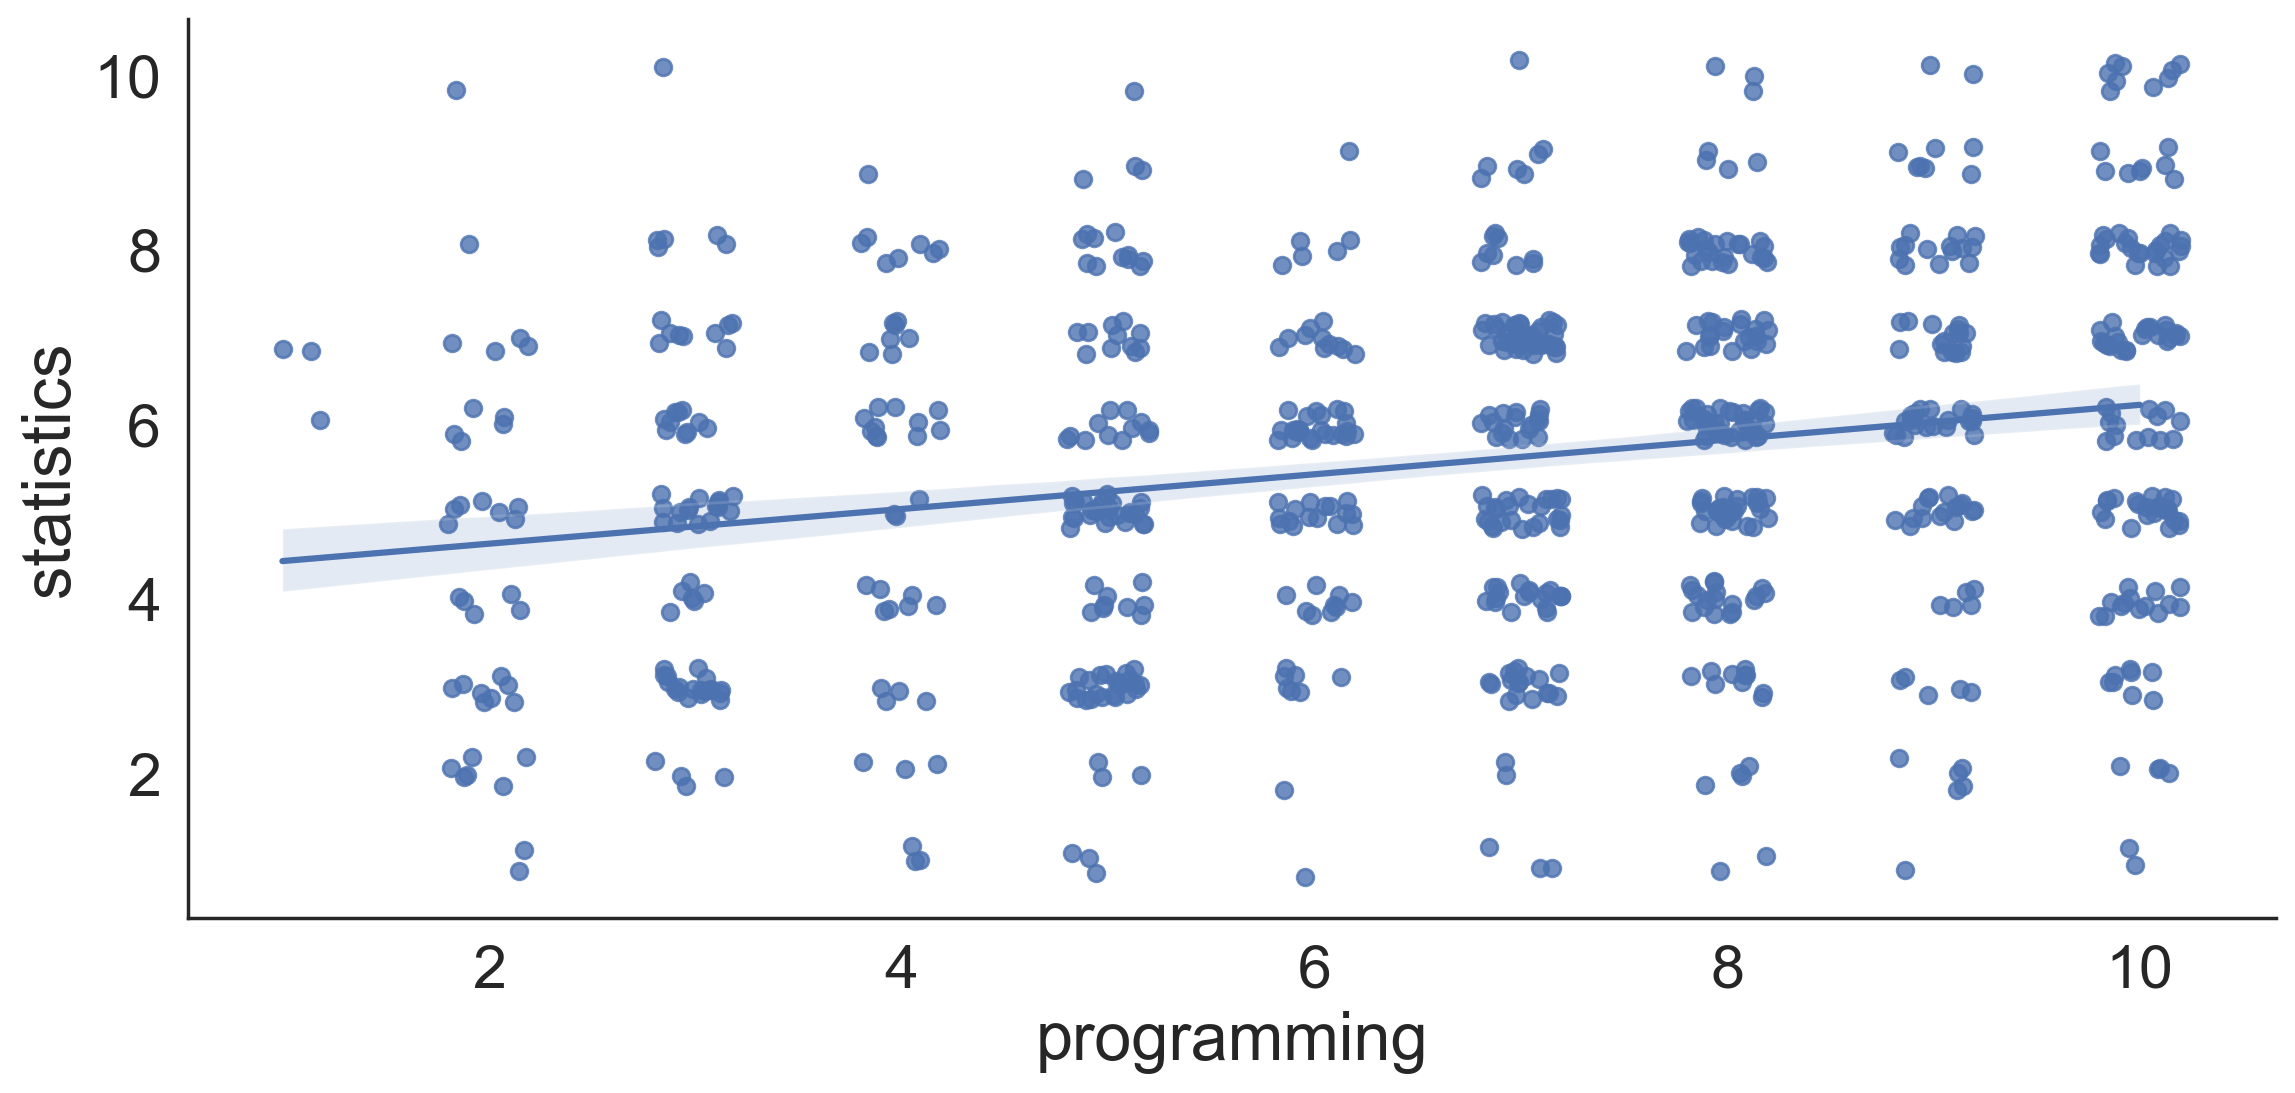

In [6]:
# and now for scatterplots
sns.scatterplot(x='programming', y='statistics', data=df,
                # alpha=0.1 # comment this in and out
               );

# alternative with pandas
# df.plot.scatter('programming', 'statistics');
# jitter points to see relationship, try different levels of it
sns.lmplot(x='programming', y='statistics', data=df,
           fit_reg=False, height=10, aspect=1.6,
          x_jitter=.15, y_jitter=.15);
# fit a linear model, showing the line of best fit 
# and also 95% confidence interval on the fit
sns.lmplot(x='programming', y='statistics', data=df,
           fit_reg=True, height=6, aspect=2,
          x_jitter=.20, y_jitter=.20)

Question #2
What can we say about the relationship between students' comfort with programming and statistics?

A) Students who are more comfortable programming are more comfortable with statistics
B) Students sho are more comfortable programming are less comfortable with statistics
C) There is little relationship between students' comfort level with programming and statistics

In [7]:
# control color palette
unique = pd.concat([df["lecture_attendance"], df["gender"]]).unique()
my_palette = dict(zip(unique, sns.color_palette()))
my_palette.update({"Total":"k"})
print(my_palette)

{'I prefer to attend lecture': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'I prefer not to attend lecture (i.e. catch up later, listen to podcast, etc.)': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), 'female': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 'male': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 'other or prefer not to say': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), 'Total': 'k'}


### !!!!

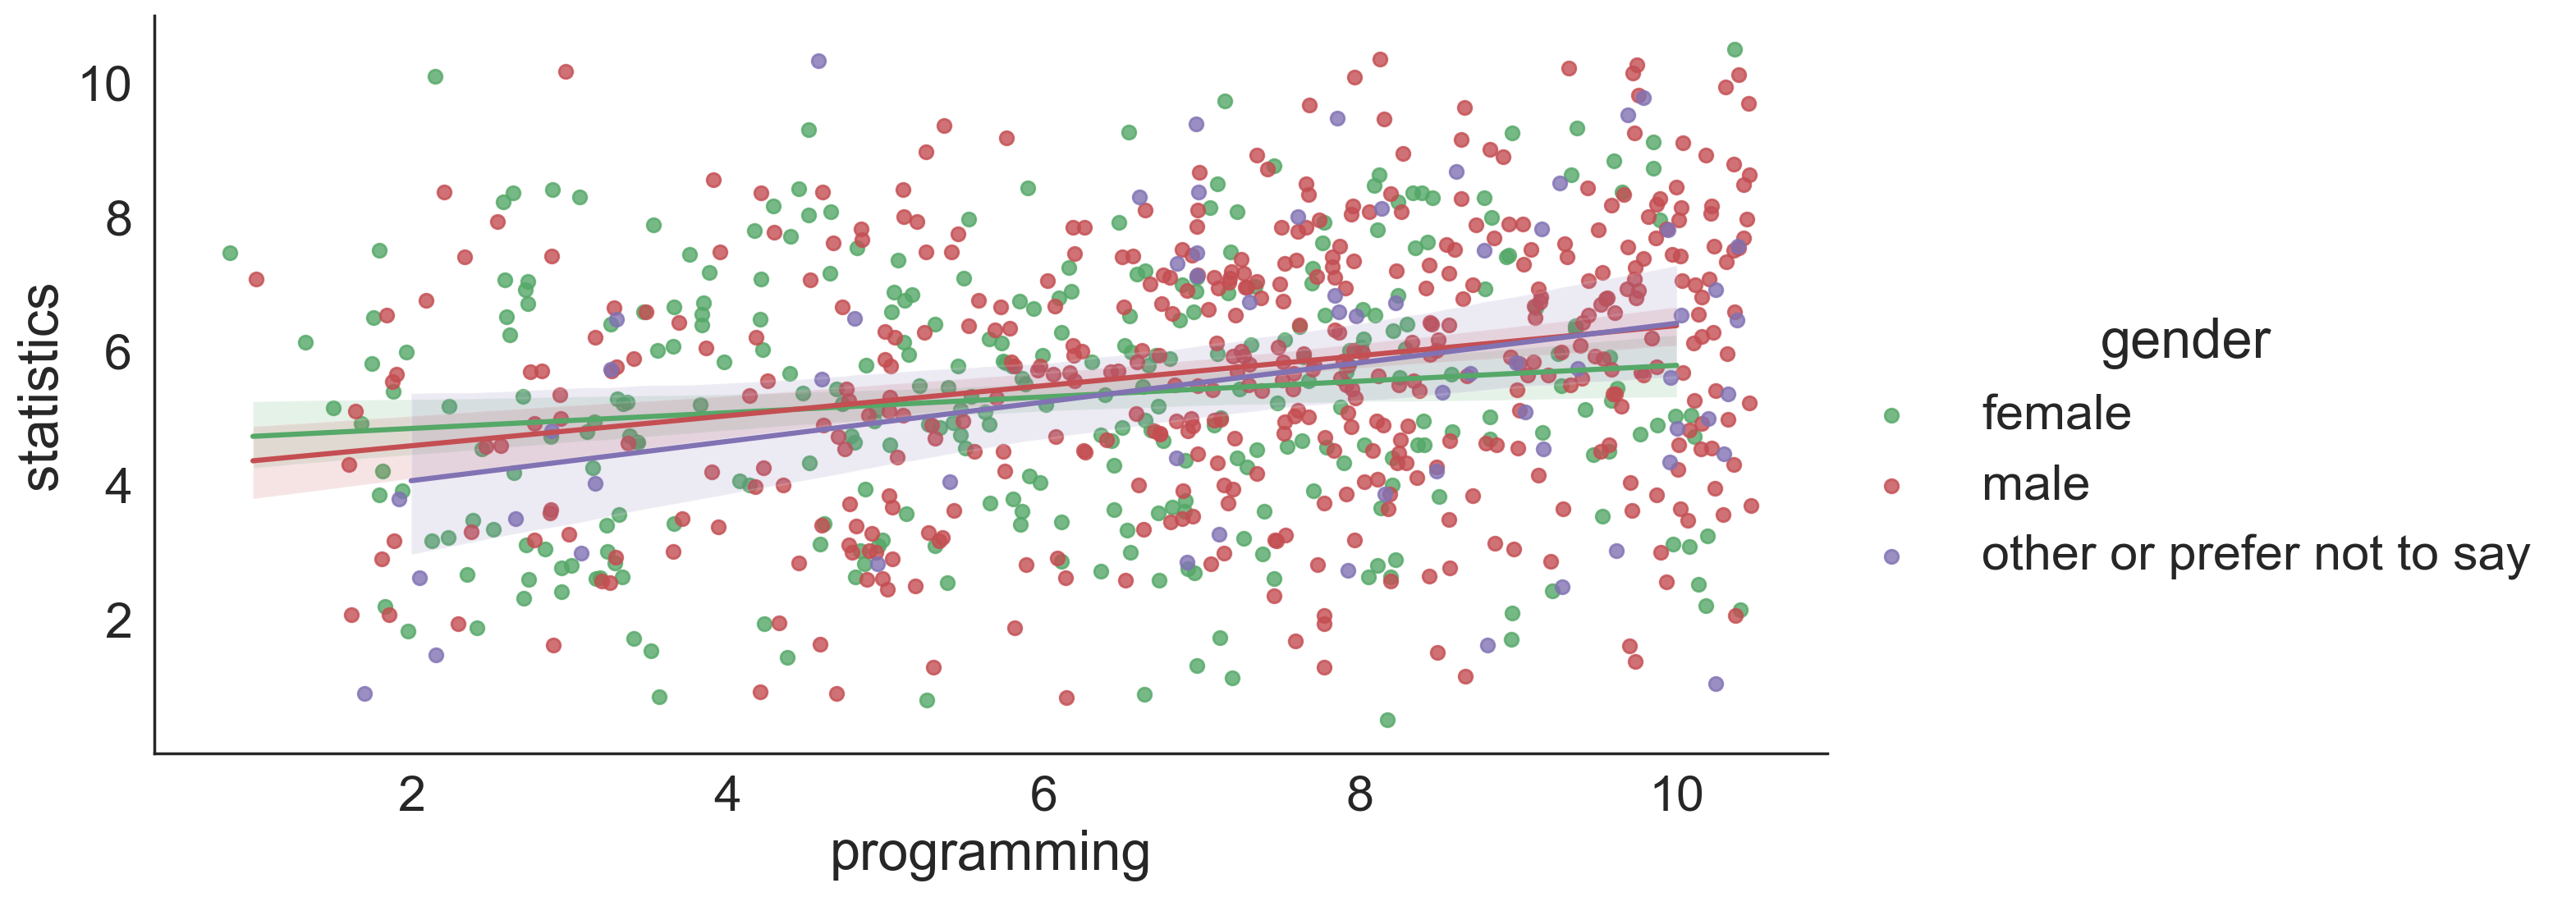

In [8]:
# color points by gender is
sns.lmplot(x='programming', y='statistics', data=df, hue='gender',
           fit_reg=True, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5,
           palette=my_palette)

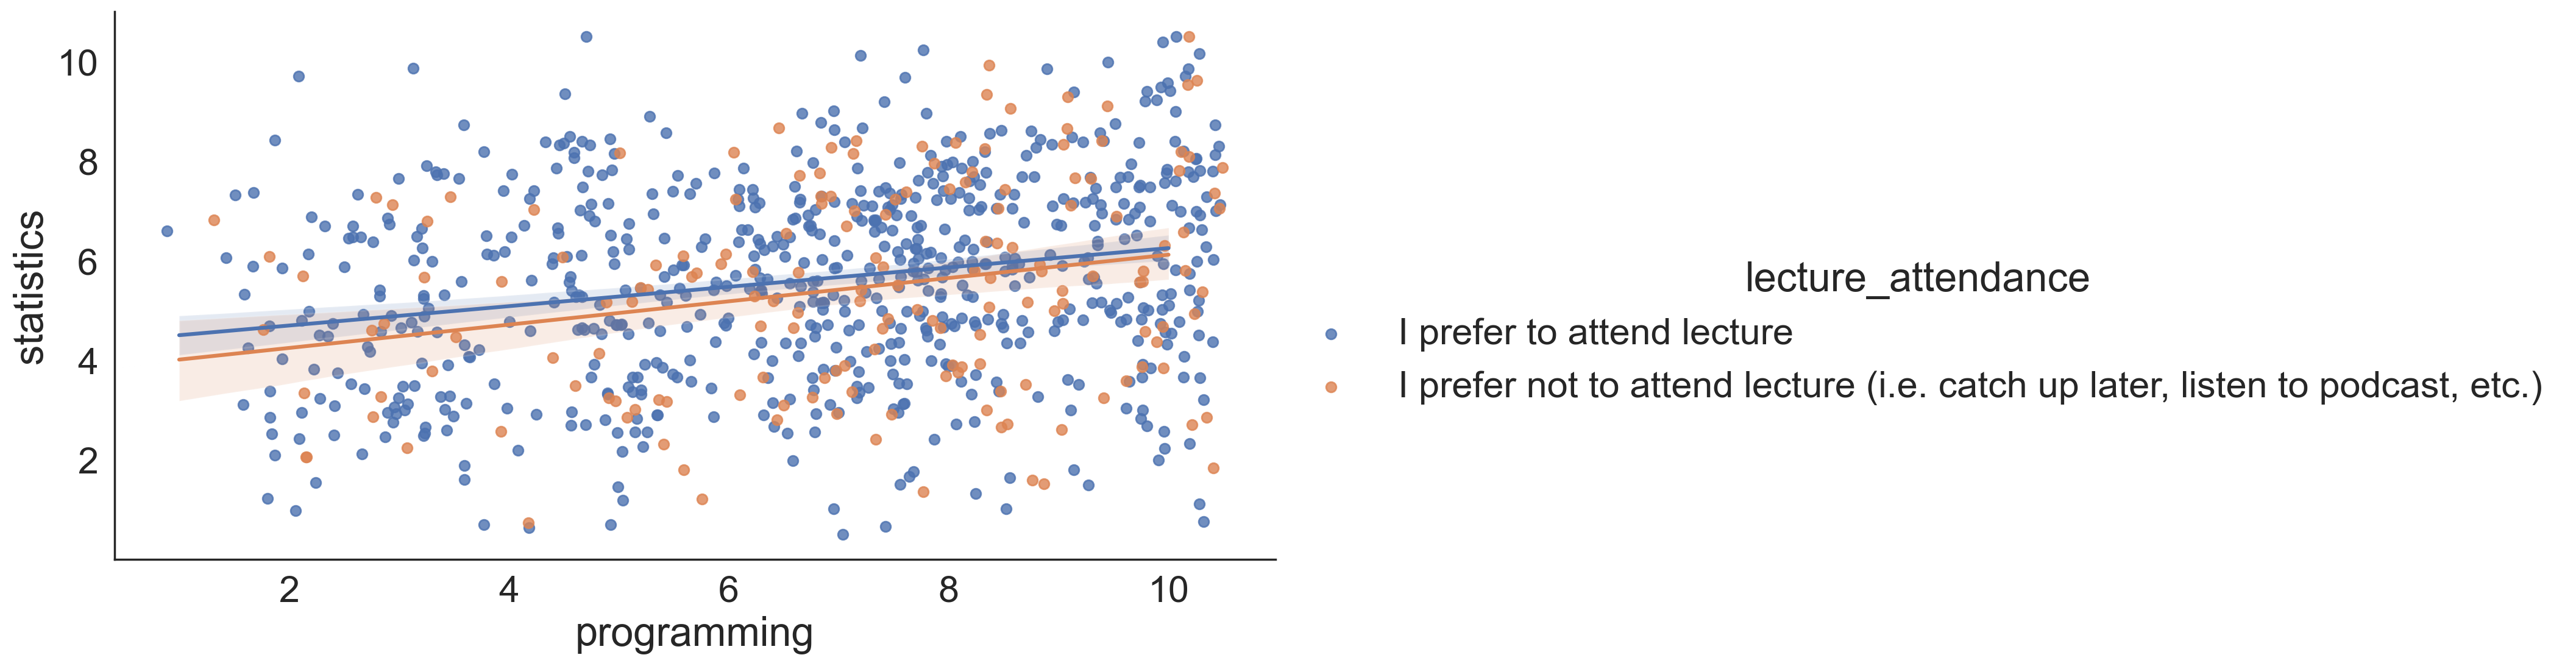

In [9]:
sns.lmplot(x='programming', y='statistics', data=df, hue='lecture_attendance',
           fit_reg=True, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5,
           palette=my_palette)

Question 3

What can we say about the relationship between students' comfortability with programming and statistics and gender? And, how easy is this to determine?

- A) Females and Other/Prefer not to say tend to be more comfortable with programming; easy to determine
- B) Females and Other/Prefer not to say tend to be more comfortable with programming; difficult to determine
- C) Males tend to be more comfortable with programming; easy to determine
- D) Males tend to be more comfortable with programming; difficult to determine
- E) I'm super lost.

In `seaborn` there are two types of bar charts:
1. `countplot` - counts the number of times each category appears in a column
2. `barplot` - groups dataframe by a categorical column and plots the height bars according to the average of a numerical column within each group (This is usually not the right way to visualize quantitative data, so we're not covering it in this class.)

/var/folders/j4/vbd5_jqx4kzgqqm0t29bshp44lddmn/T/ipykernel_95649/1572338402.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(("attend", "not attend"));


Text(0.5, 0, 'Gender')

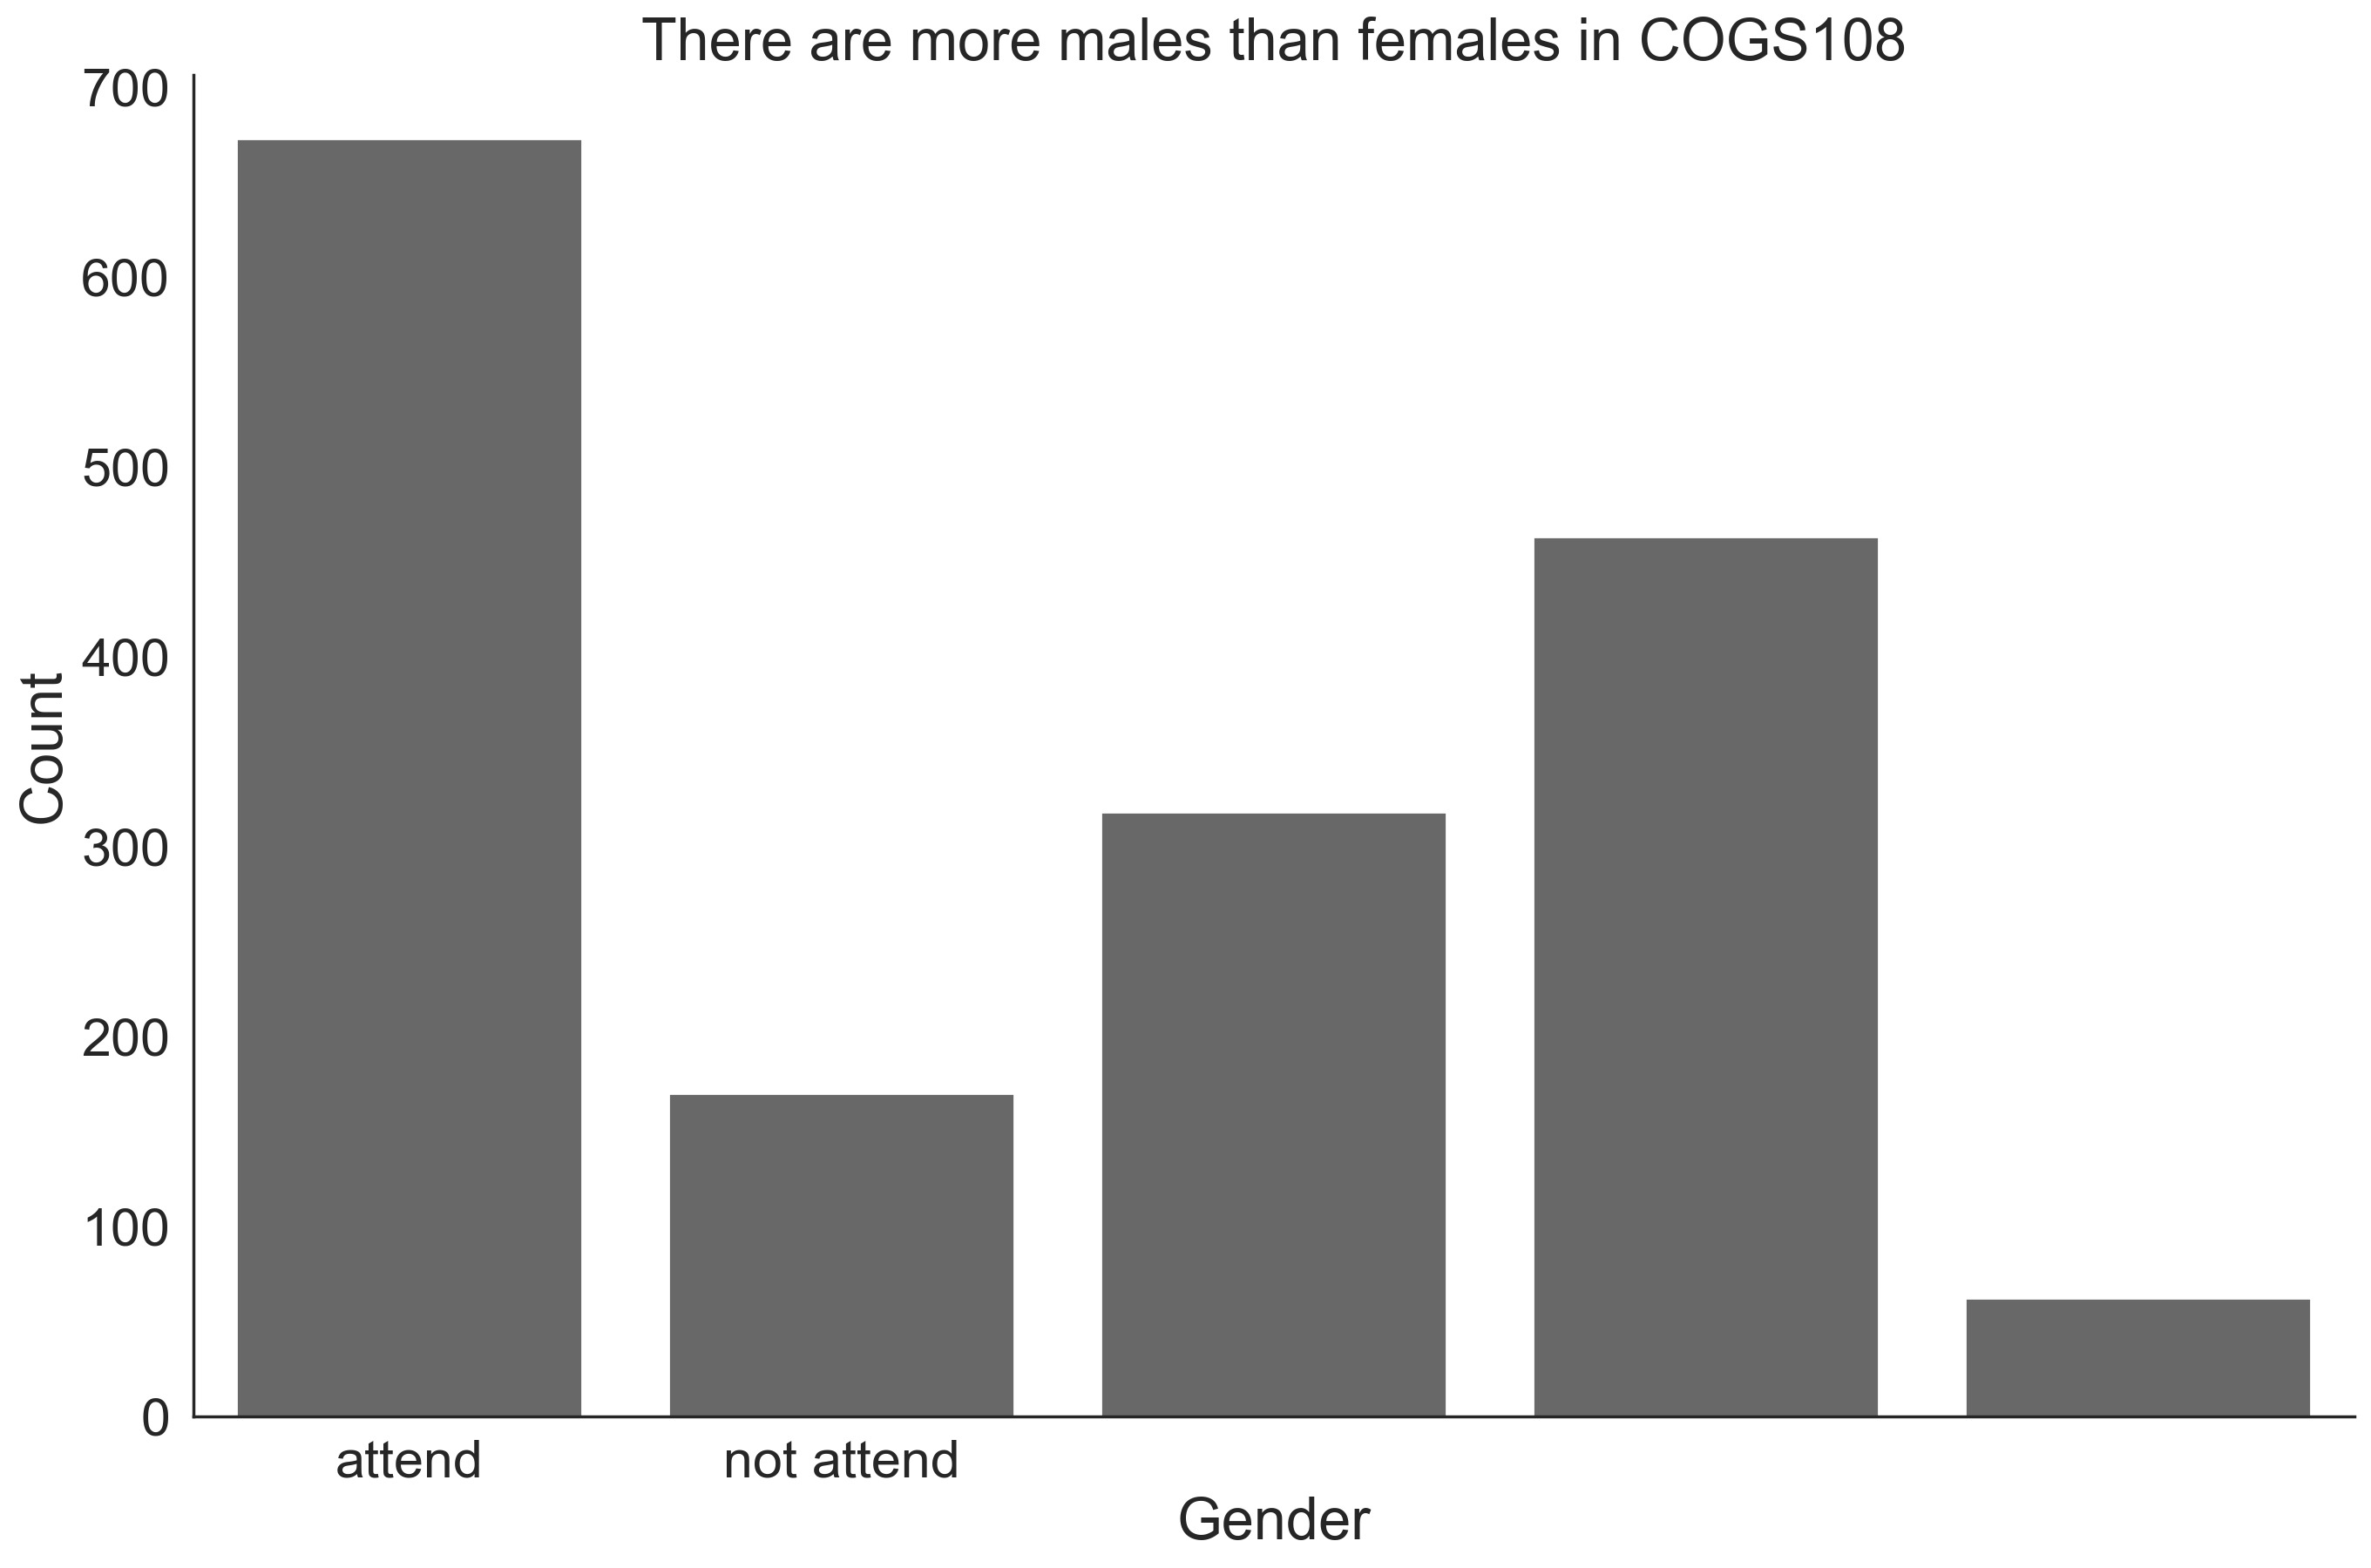

In [10]:
# generate default barplot
sns.countplot(x='lecture_attendance', 
              data=df#COMMENT THIS IN AND OUT .replace({ 'I prefer to attend lecture': 'prefer to attend', 'I prefer not to attend lecture (i.e. catch up later, listen to podcast, etc.)': 'prefer to not attend'} )
             );
ax = sns.countplot(x='lecture_attendance', 
                   data=df, color = '#686868')
sns.despine()
# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
# set tick labels
ax.set_xticklabels(("attend", "not attend"));
ax = sns.countplot(x='gender', data=df, color='#686868')

# add title and axis labels (modify x-axis label)
ax.set_title('There are more males than females in COGS108')
ax.set_ylabel('Count') 
ax.set_xlabel('Gender')

Text(0.5, 0, 'Gender')

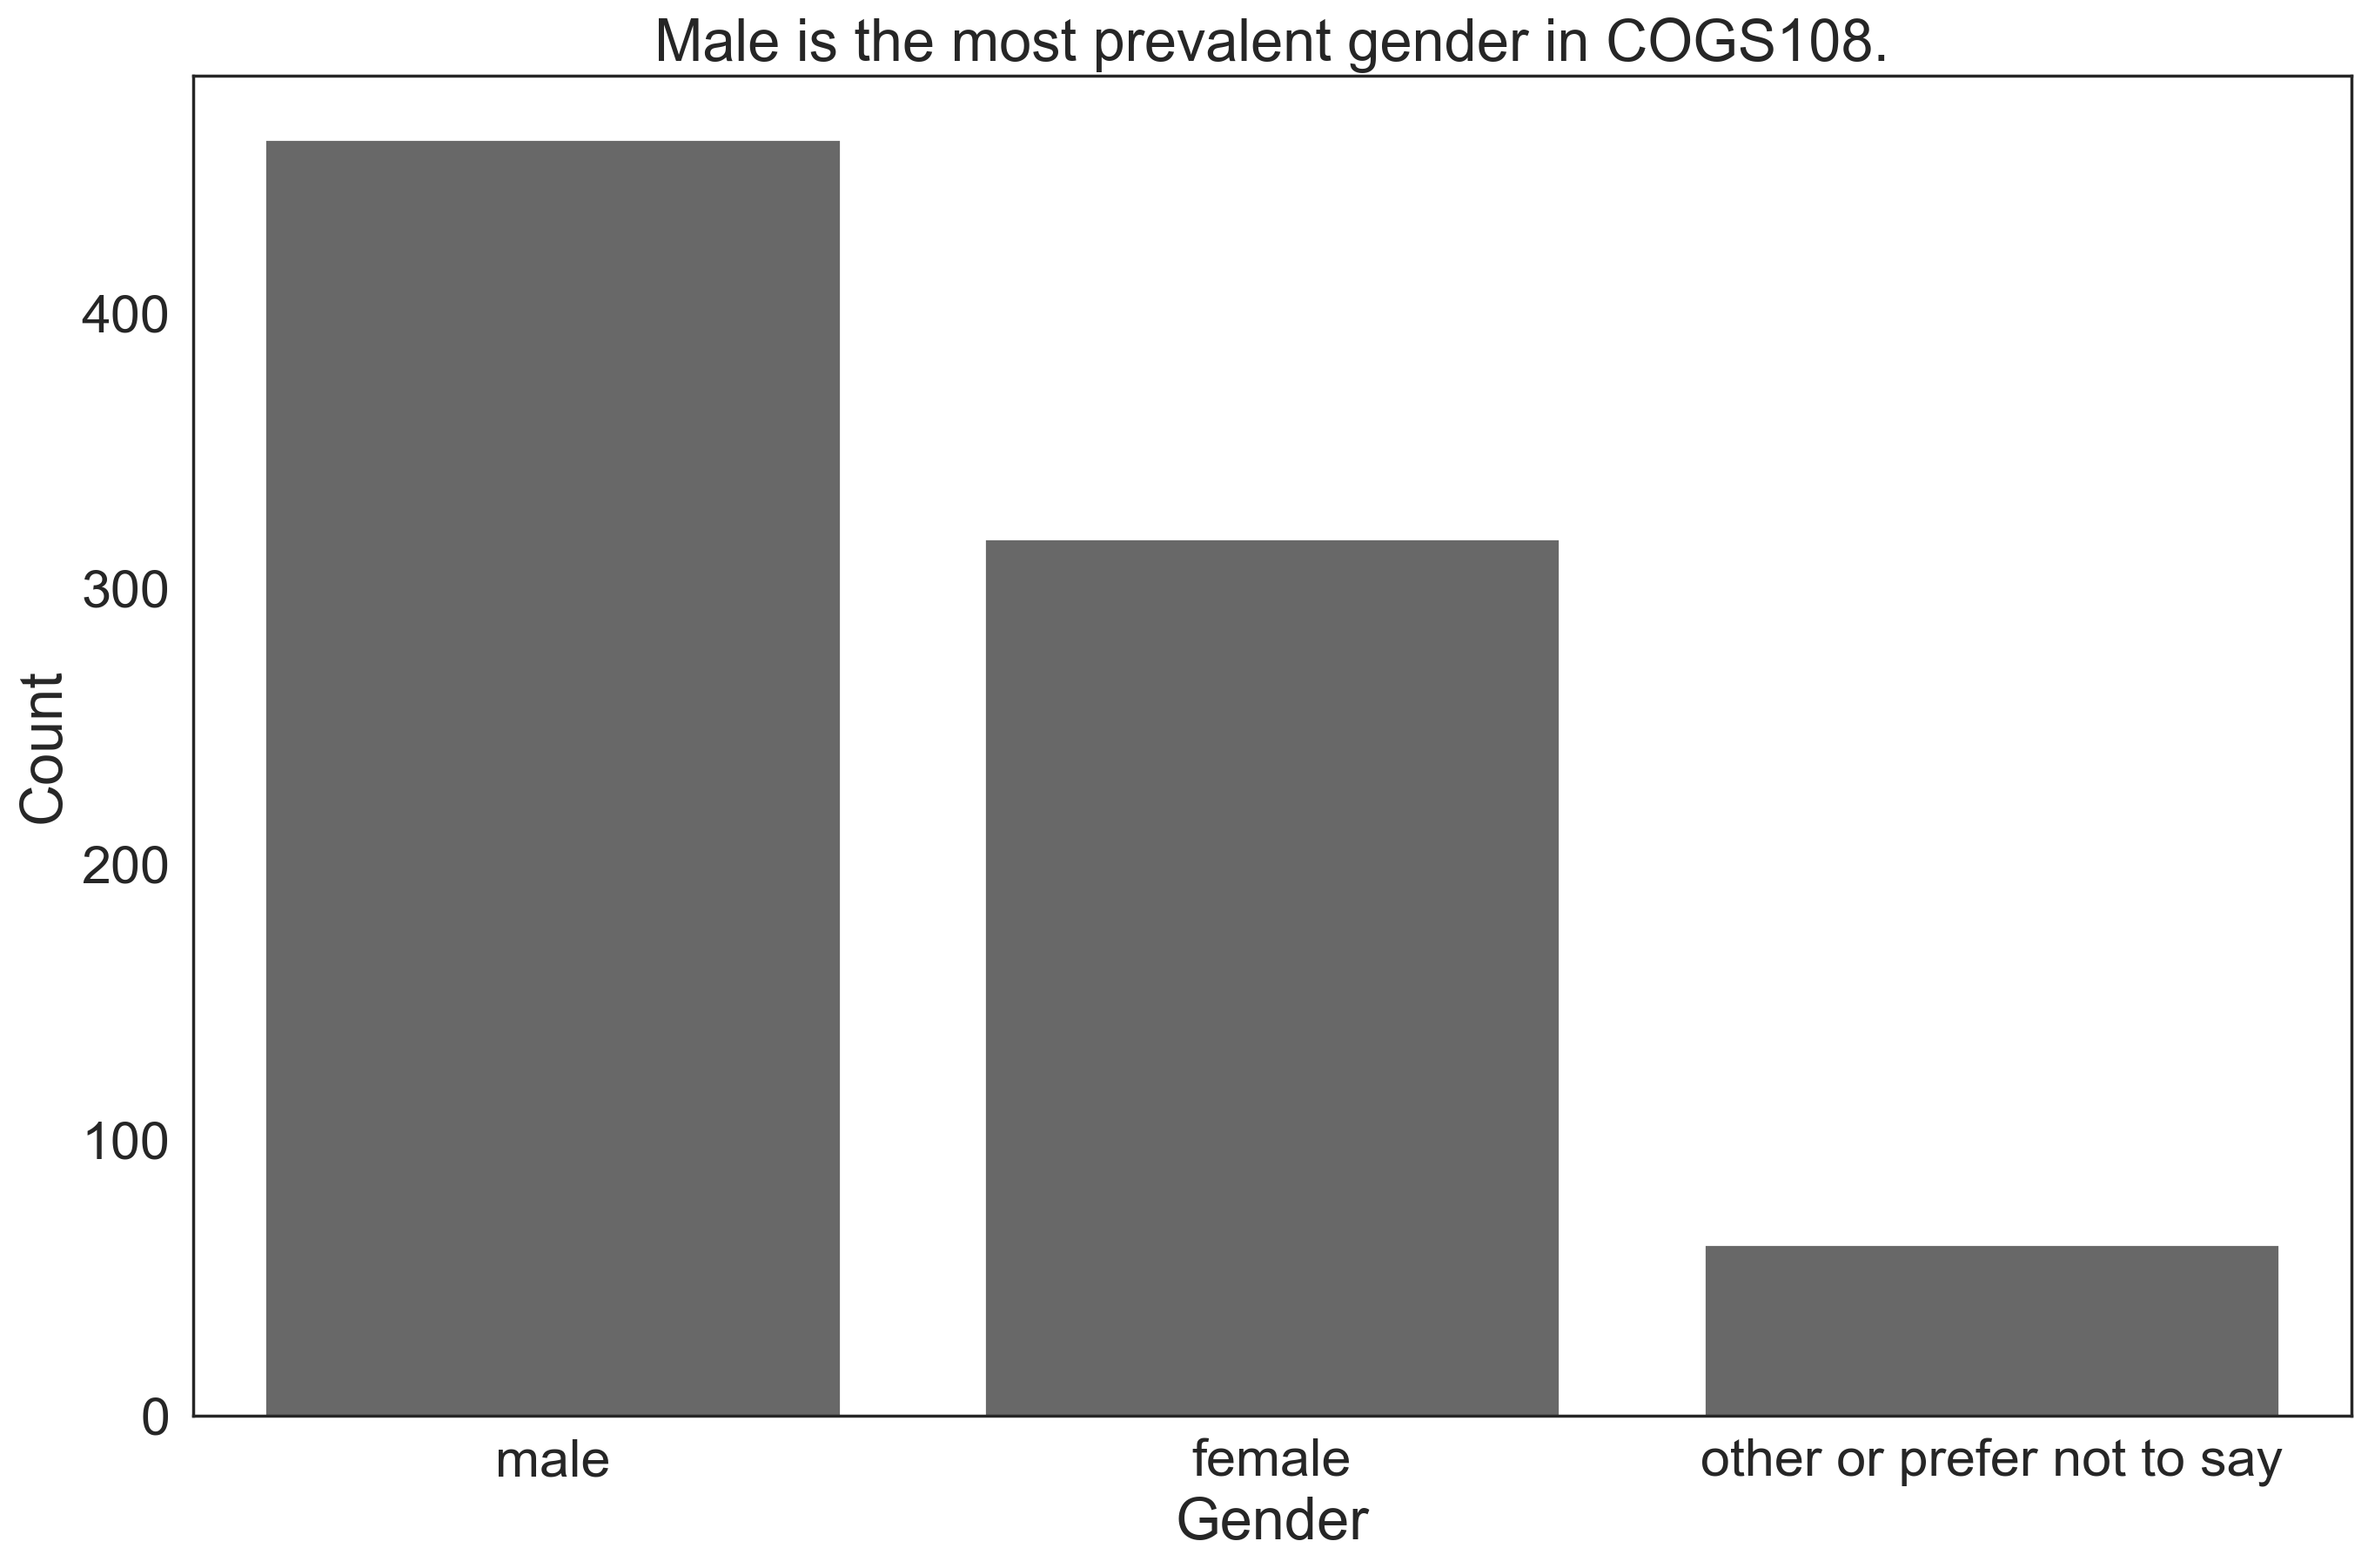

In [11]:
#It's often a good idea to order axes from largest to smallest for categorical data.
ax = sns.countplot(x='gender', data=df, color = '#686868',
             order=['male', 'female', 'other or prefer not to say'])

# add title and axis labels (modify x-axis label)
ax.set_title('Male is the most prevalent gender in COGS108.')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')

<Axes: >

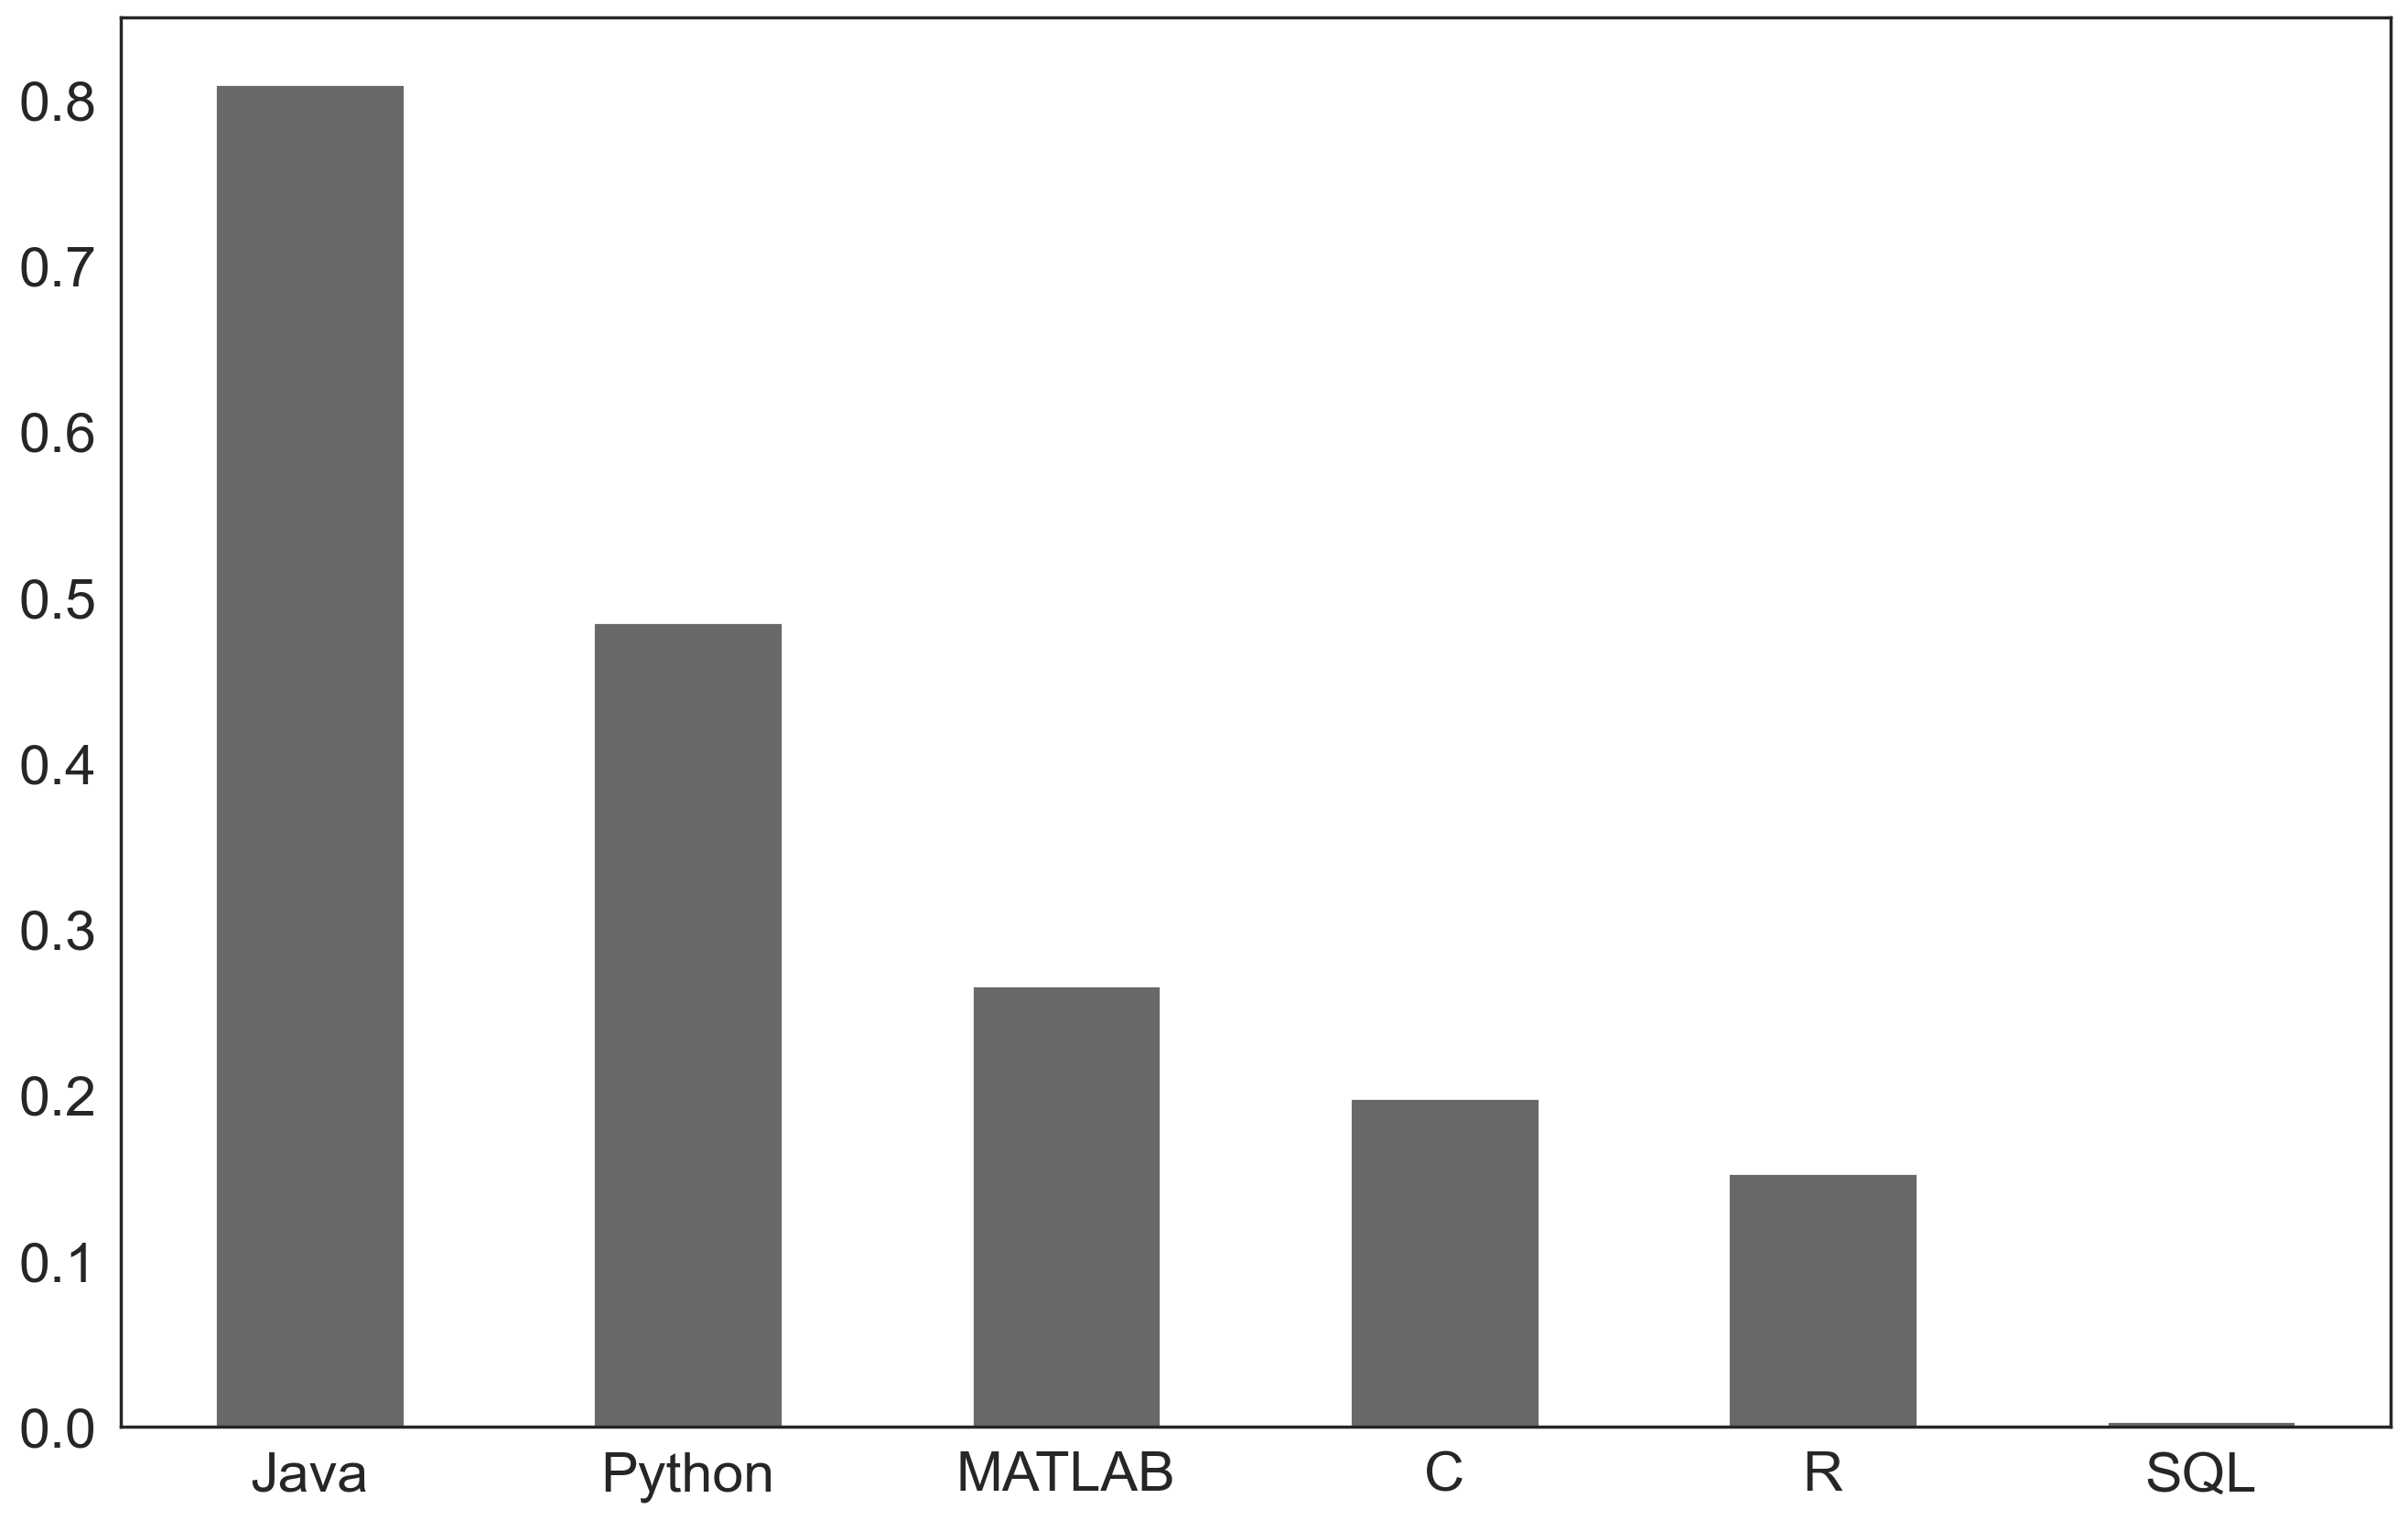

In [12]:
# warning: not seaborn
# pandas approach
# proportion of the class familiar with each programming language
a = df.iloc[:,5:11].sum()/len(df)
a = a.sort_values(axis=0, ascending=False)
a.plot.bar(color='#686868', rot=0)

Text(0, 0.5, 'Proportion of students')

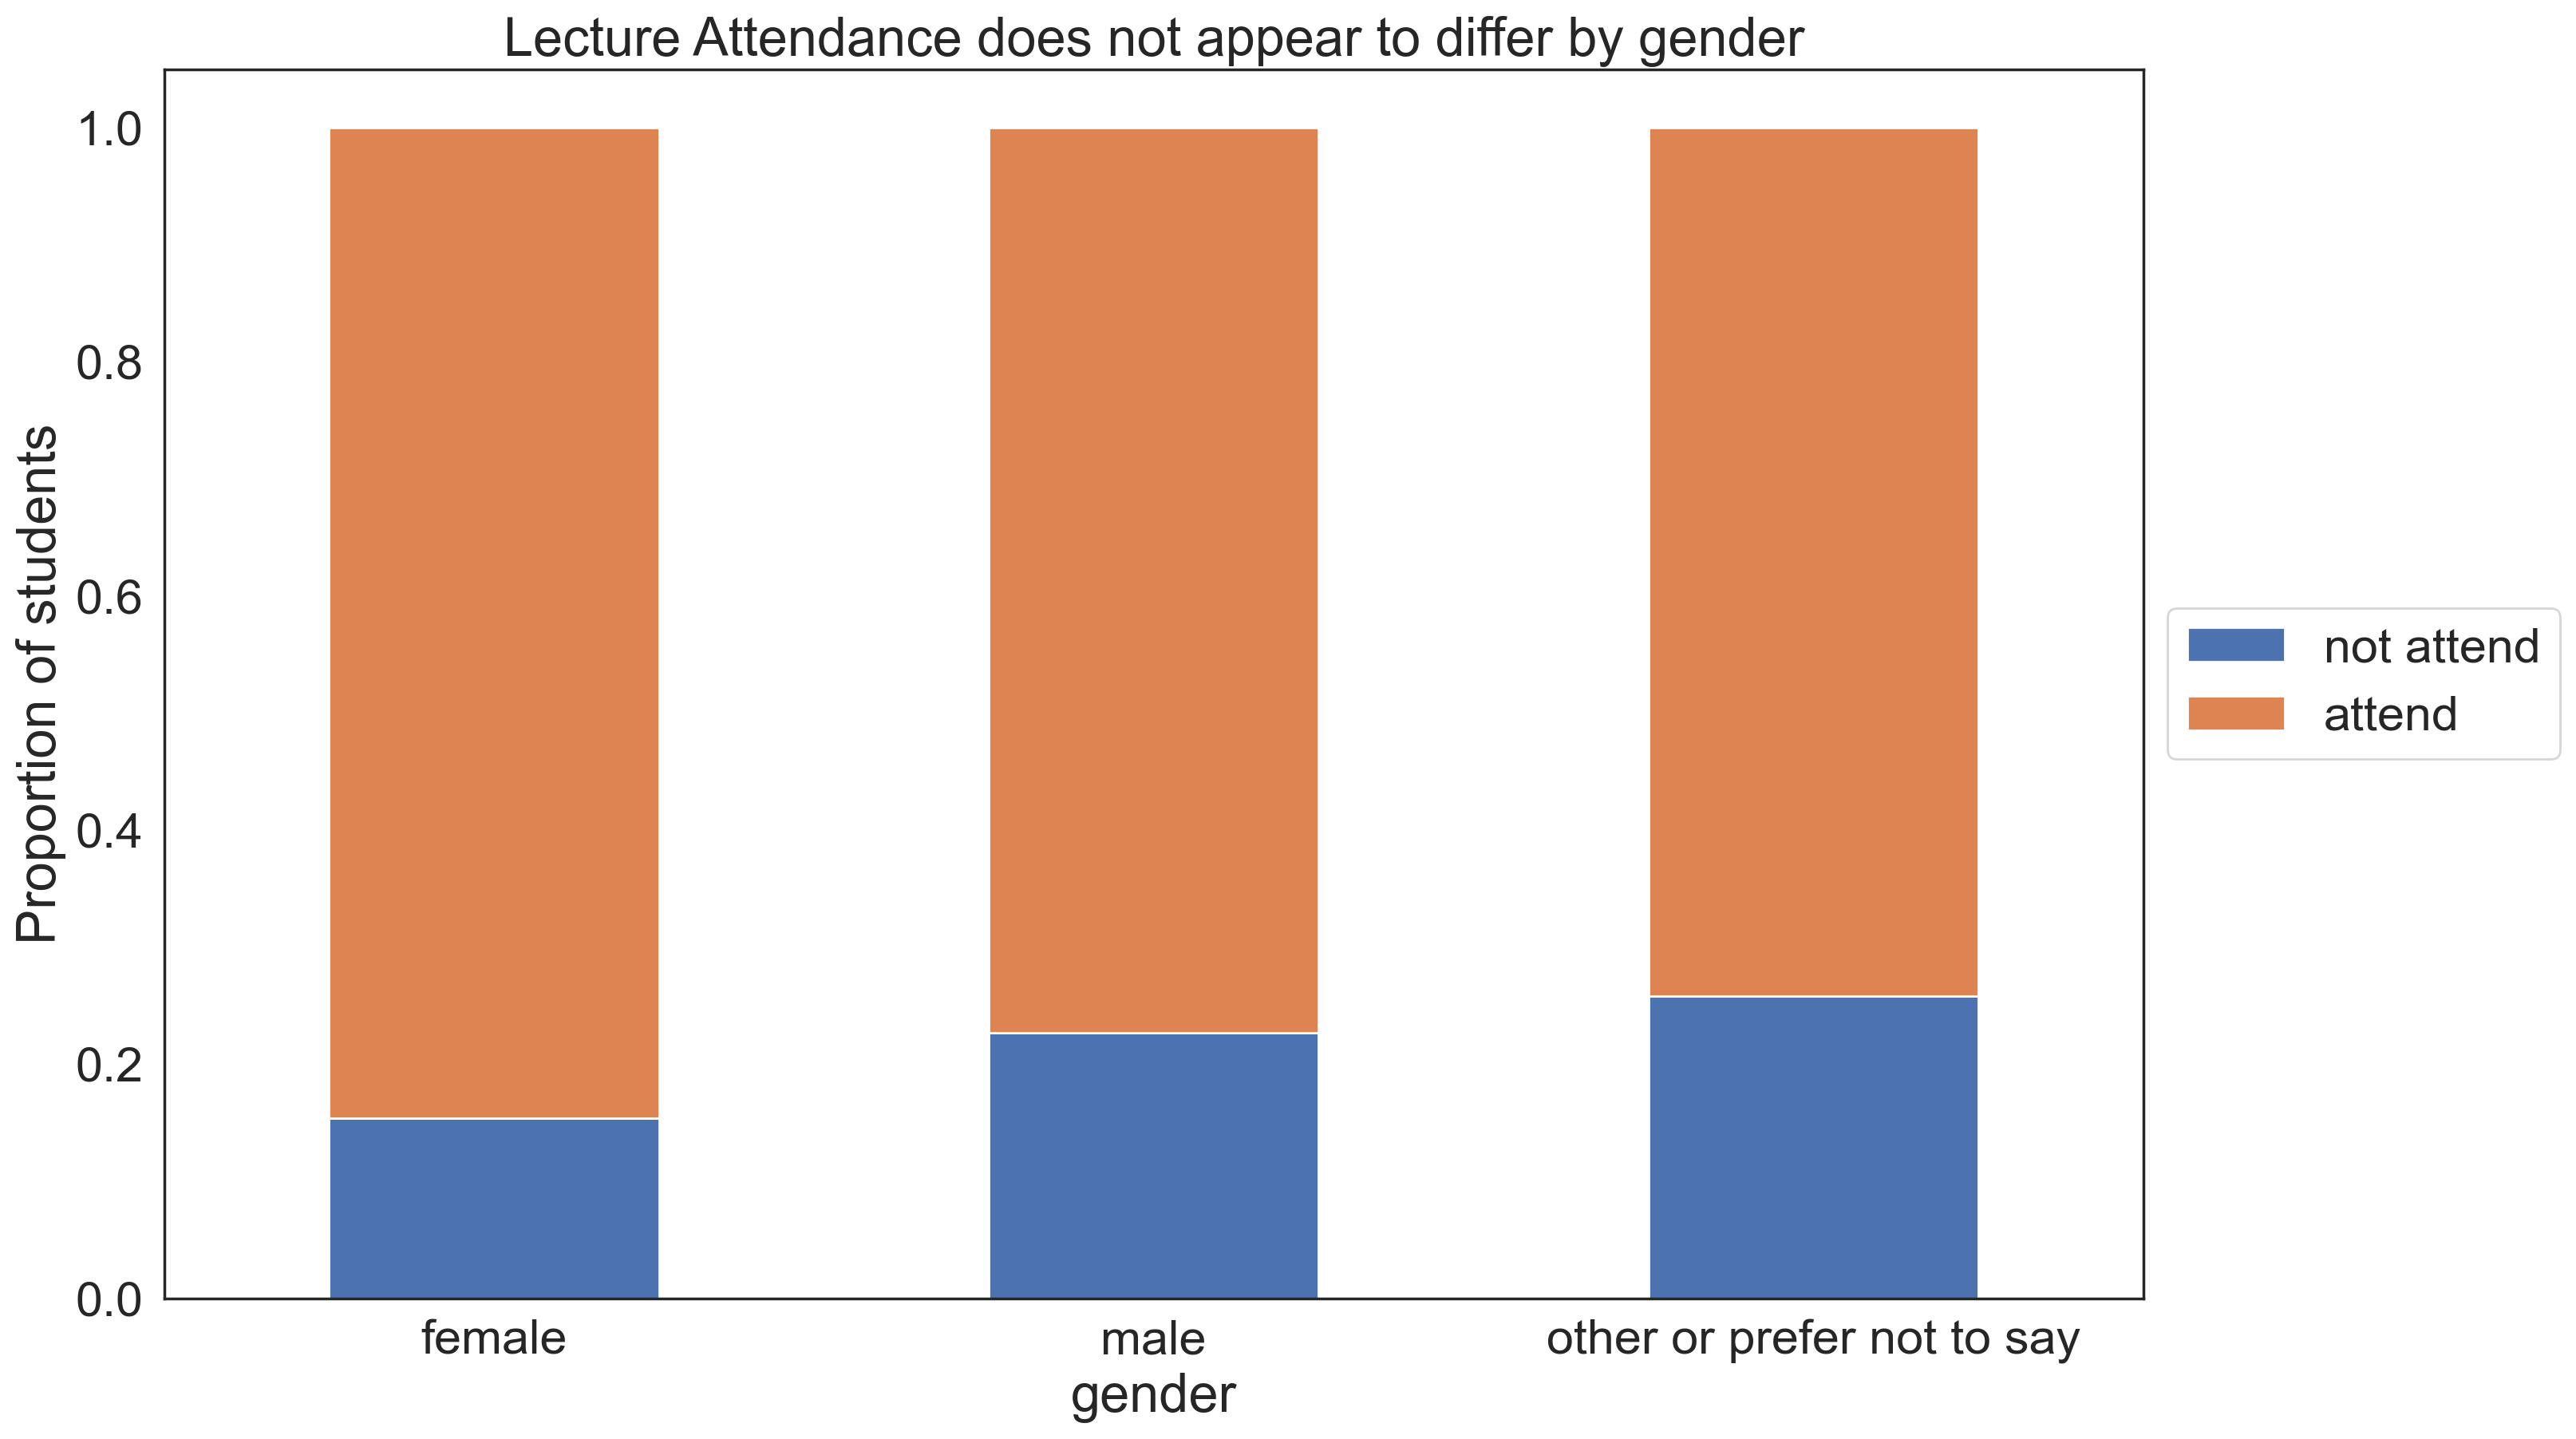

In [13]:
#stacked barplots
# warning: this is not seaborn
df2 = df.groupby([ 'lecture_attendance','gender'])['lecture_attendance'].count().unstack('gender').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                  title='Lecture Attendance does not appear to differ by gender')

# customize plot
ax.legend(('not attend','attend'), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of students")

<Axes: xlabel='statistics', ylabel='gender'>

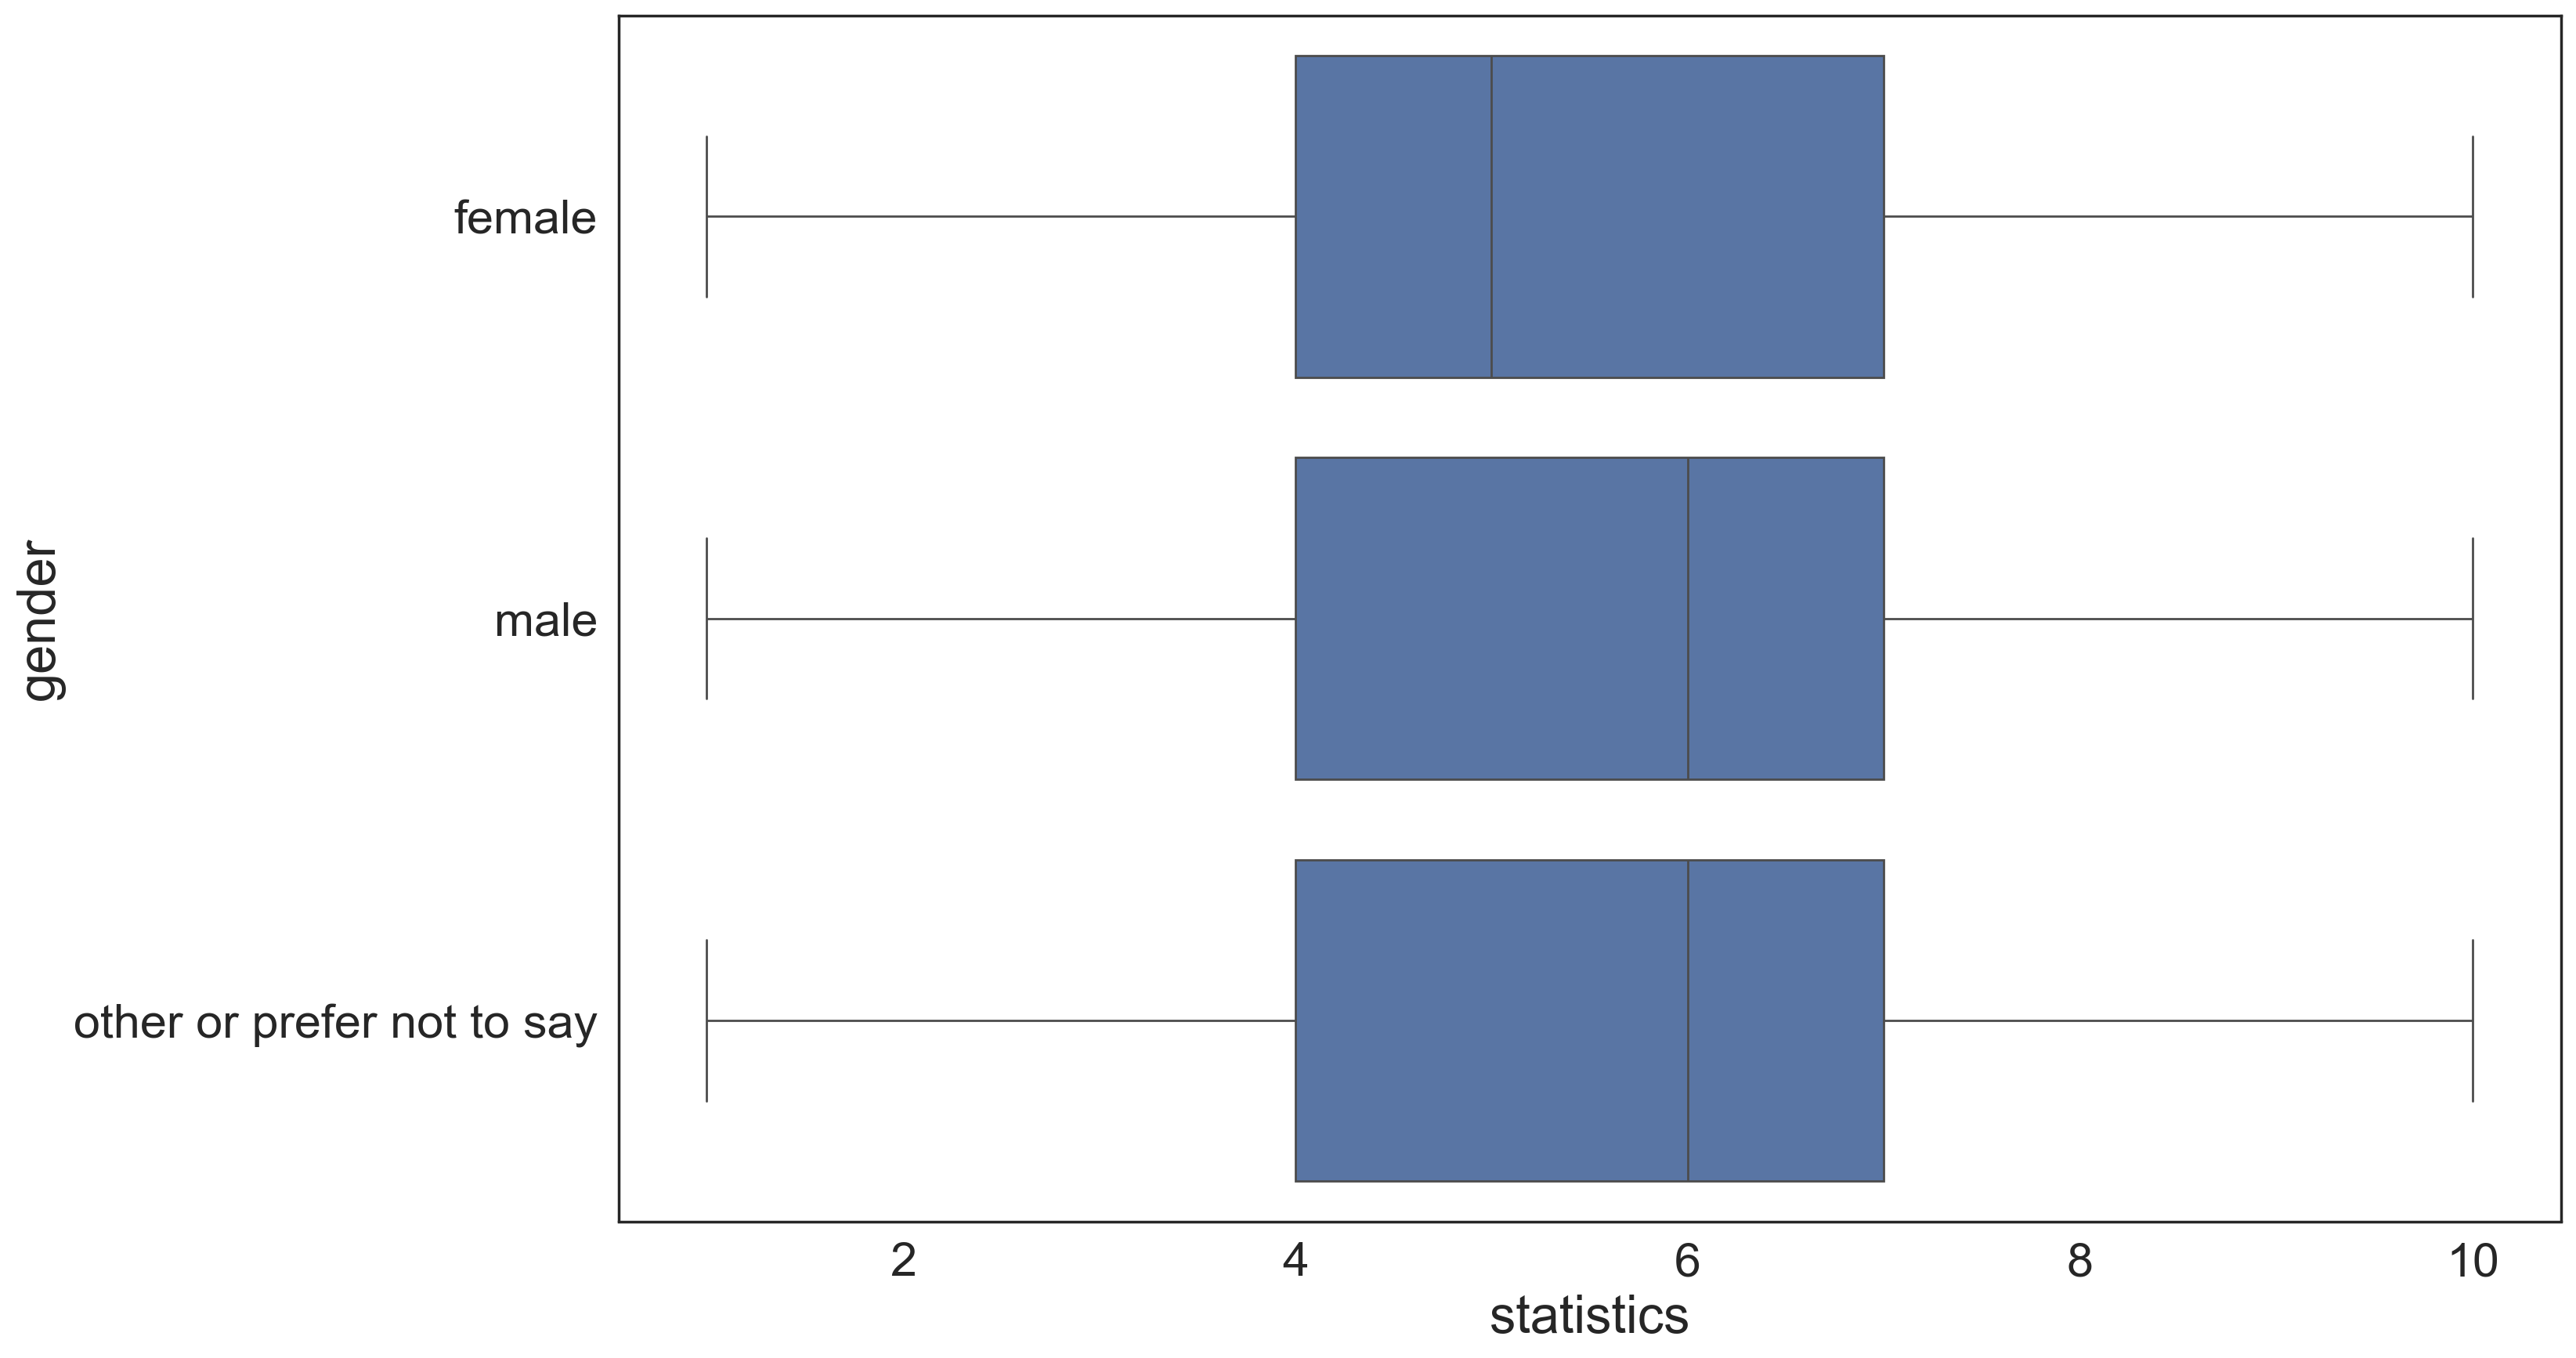

In [14]:
# Boxplots
#By default, the box delineates the 25th and 75th percentile. The line down the middle represents the median. "Whiskers" extend to show the range for the rest of the data, excluding outliers. Outliers are marked as individual points outside of the whiskers.
# generate boxplots
sns.boxplot(x='statistics', y='gender', data=df)

In [15]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['statistics'], [25, 75])
lower, upper
# calculate IQR
iqr = upper - lower
iqr
# Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers. 
# calculate lower cutoff
# values below this are outliers 
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers 
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

(-0.5, 11.5)

Text(0.5, 0, 'Gender')

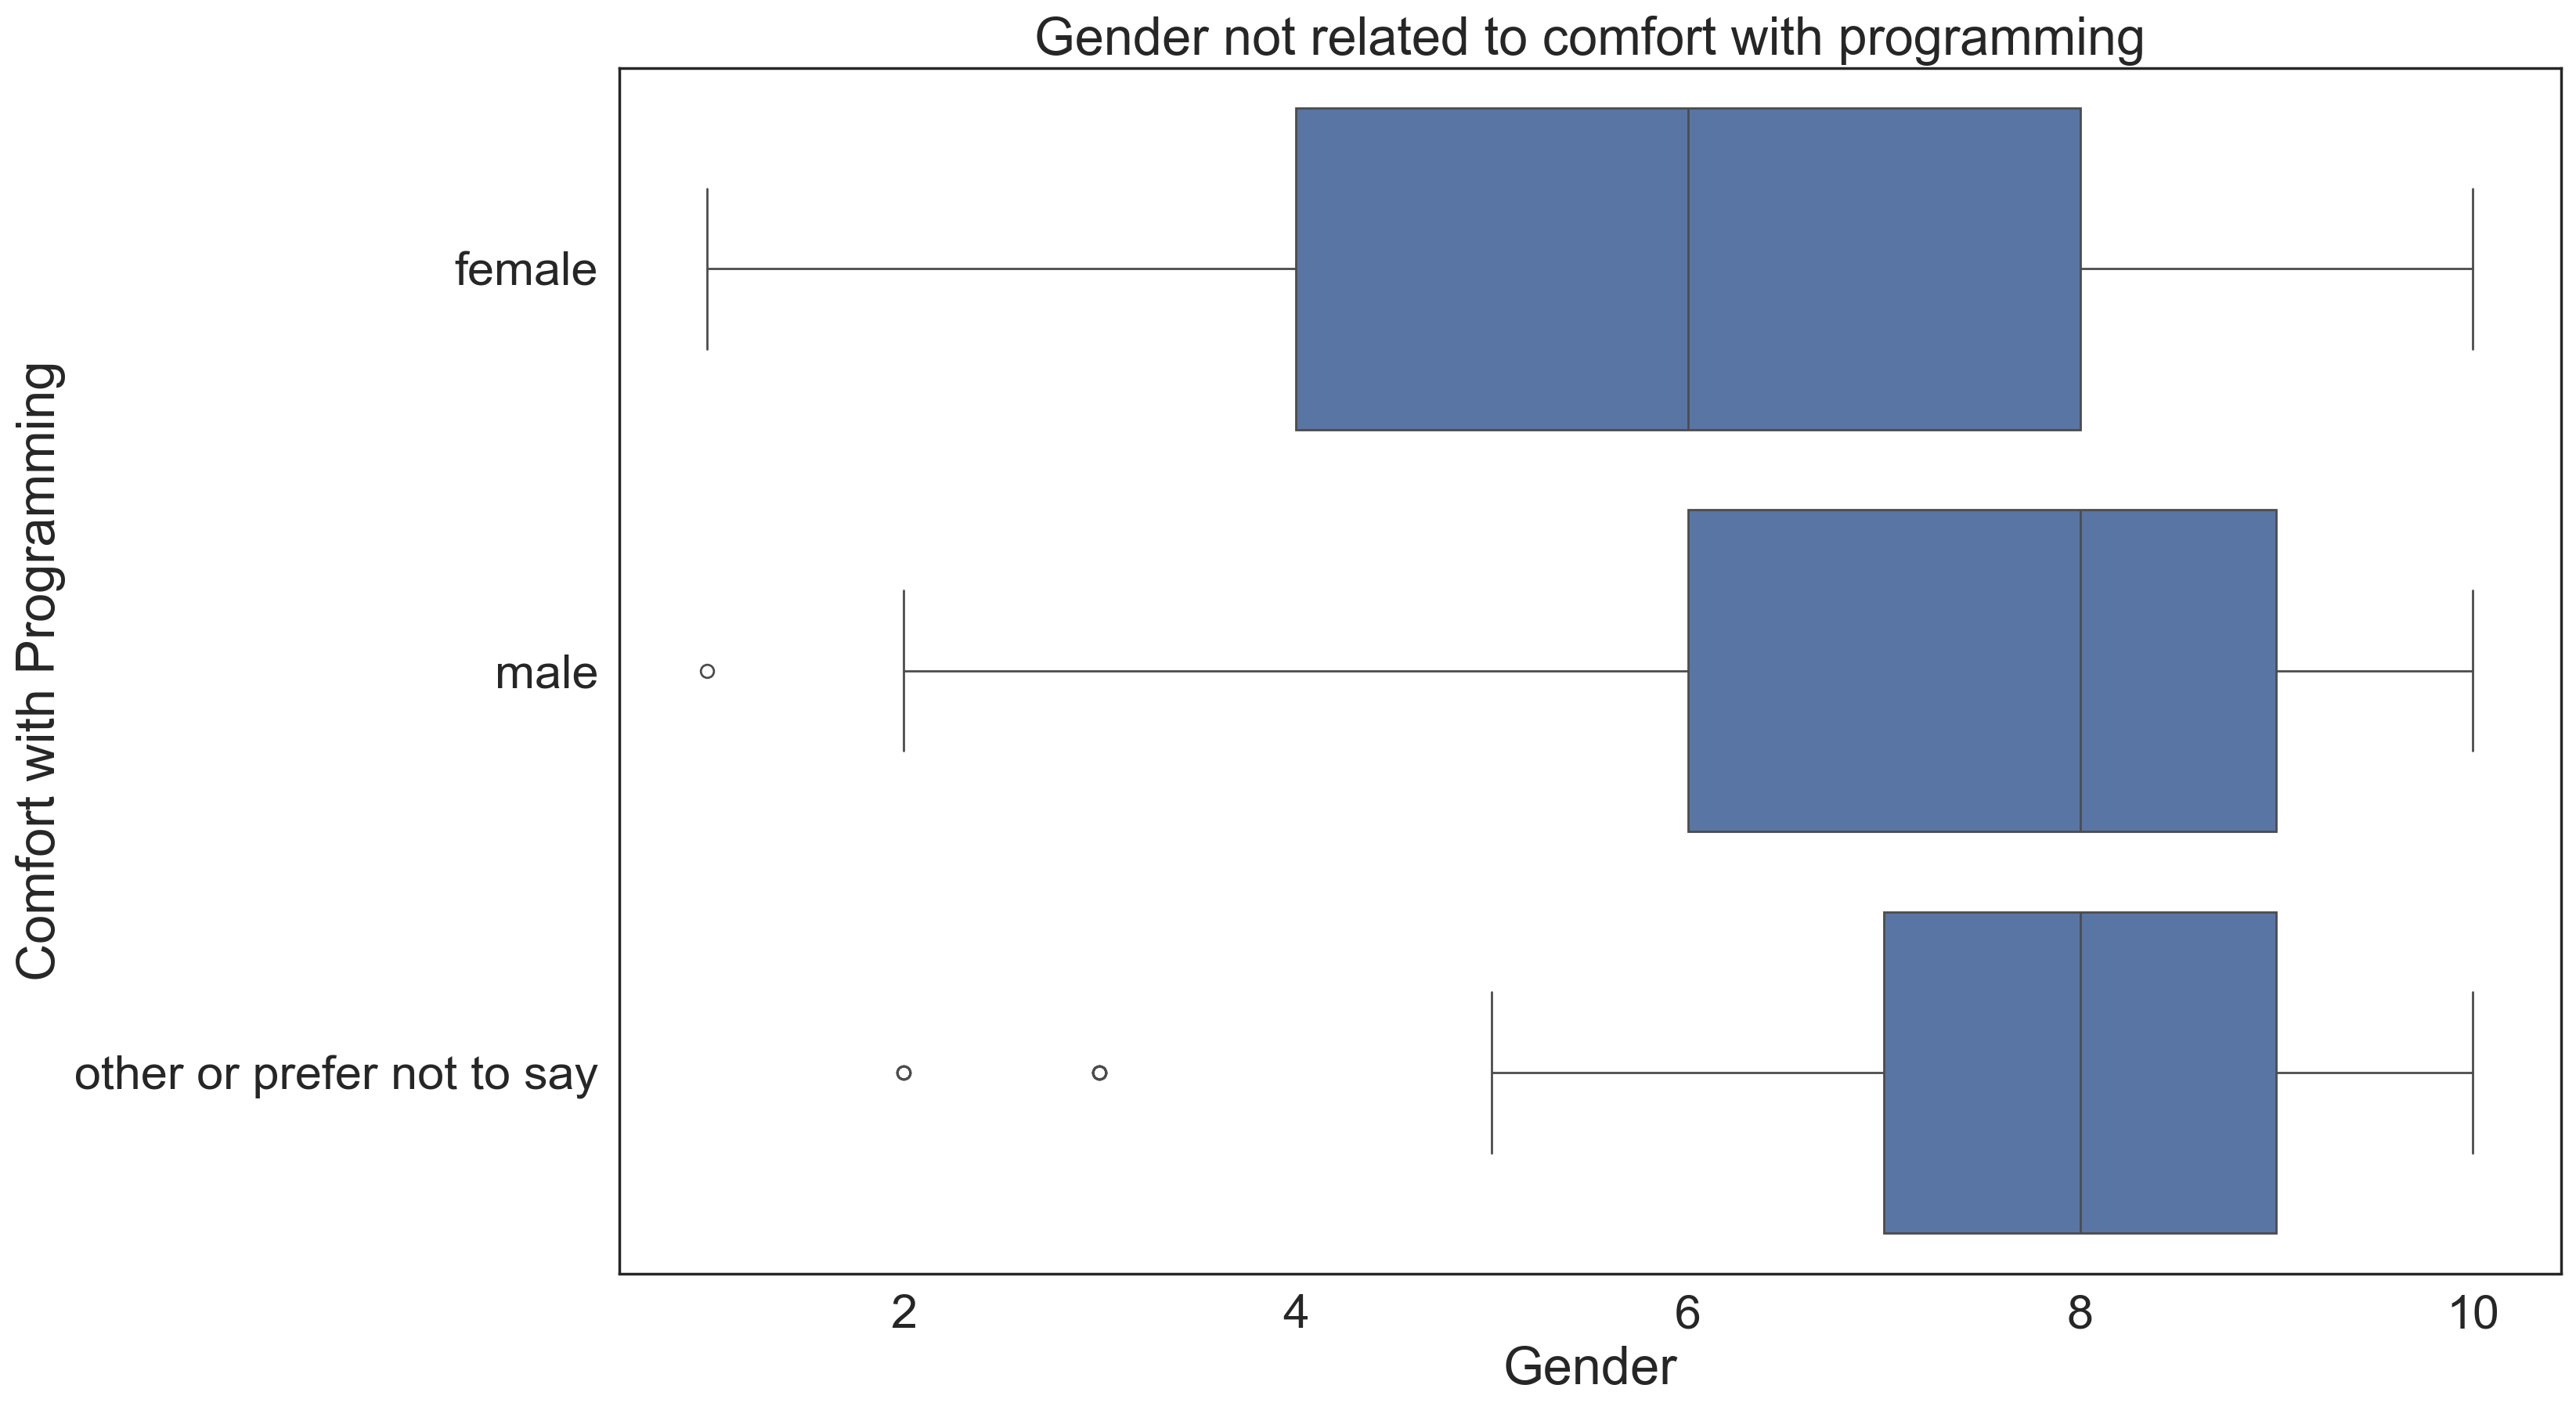

In [16]:
# generate boxplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(y='gender', x='programming', data=df)

ax.set_title('Gender not related to comfort with programming')
ax.set_ylabel('Comfort with Programming')
ax.set_xlabel('Gender')

/var/folders/j4/vbd5_jqx4kzgqqm0t29bshp44lddmn/T/ipykernel_95649/3698016639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='gender', y='statistics', data=df, palette=my_palette)


Text(0.5, 0, 'Gender')

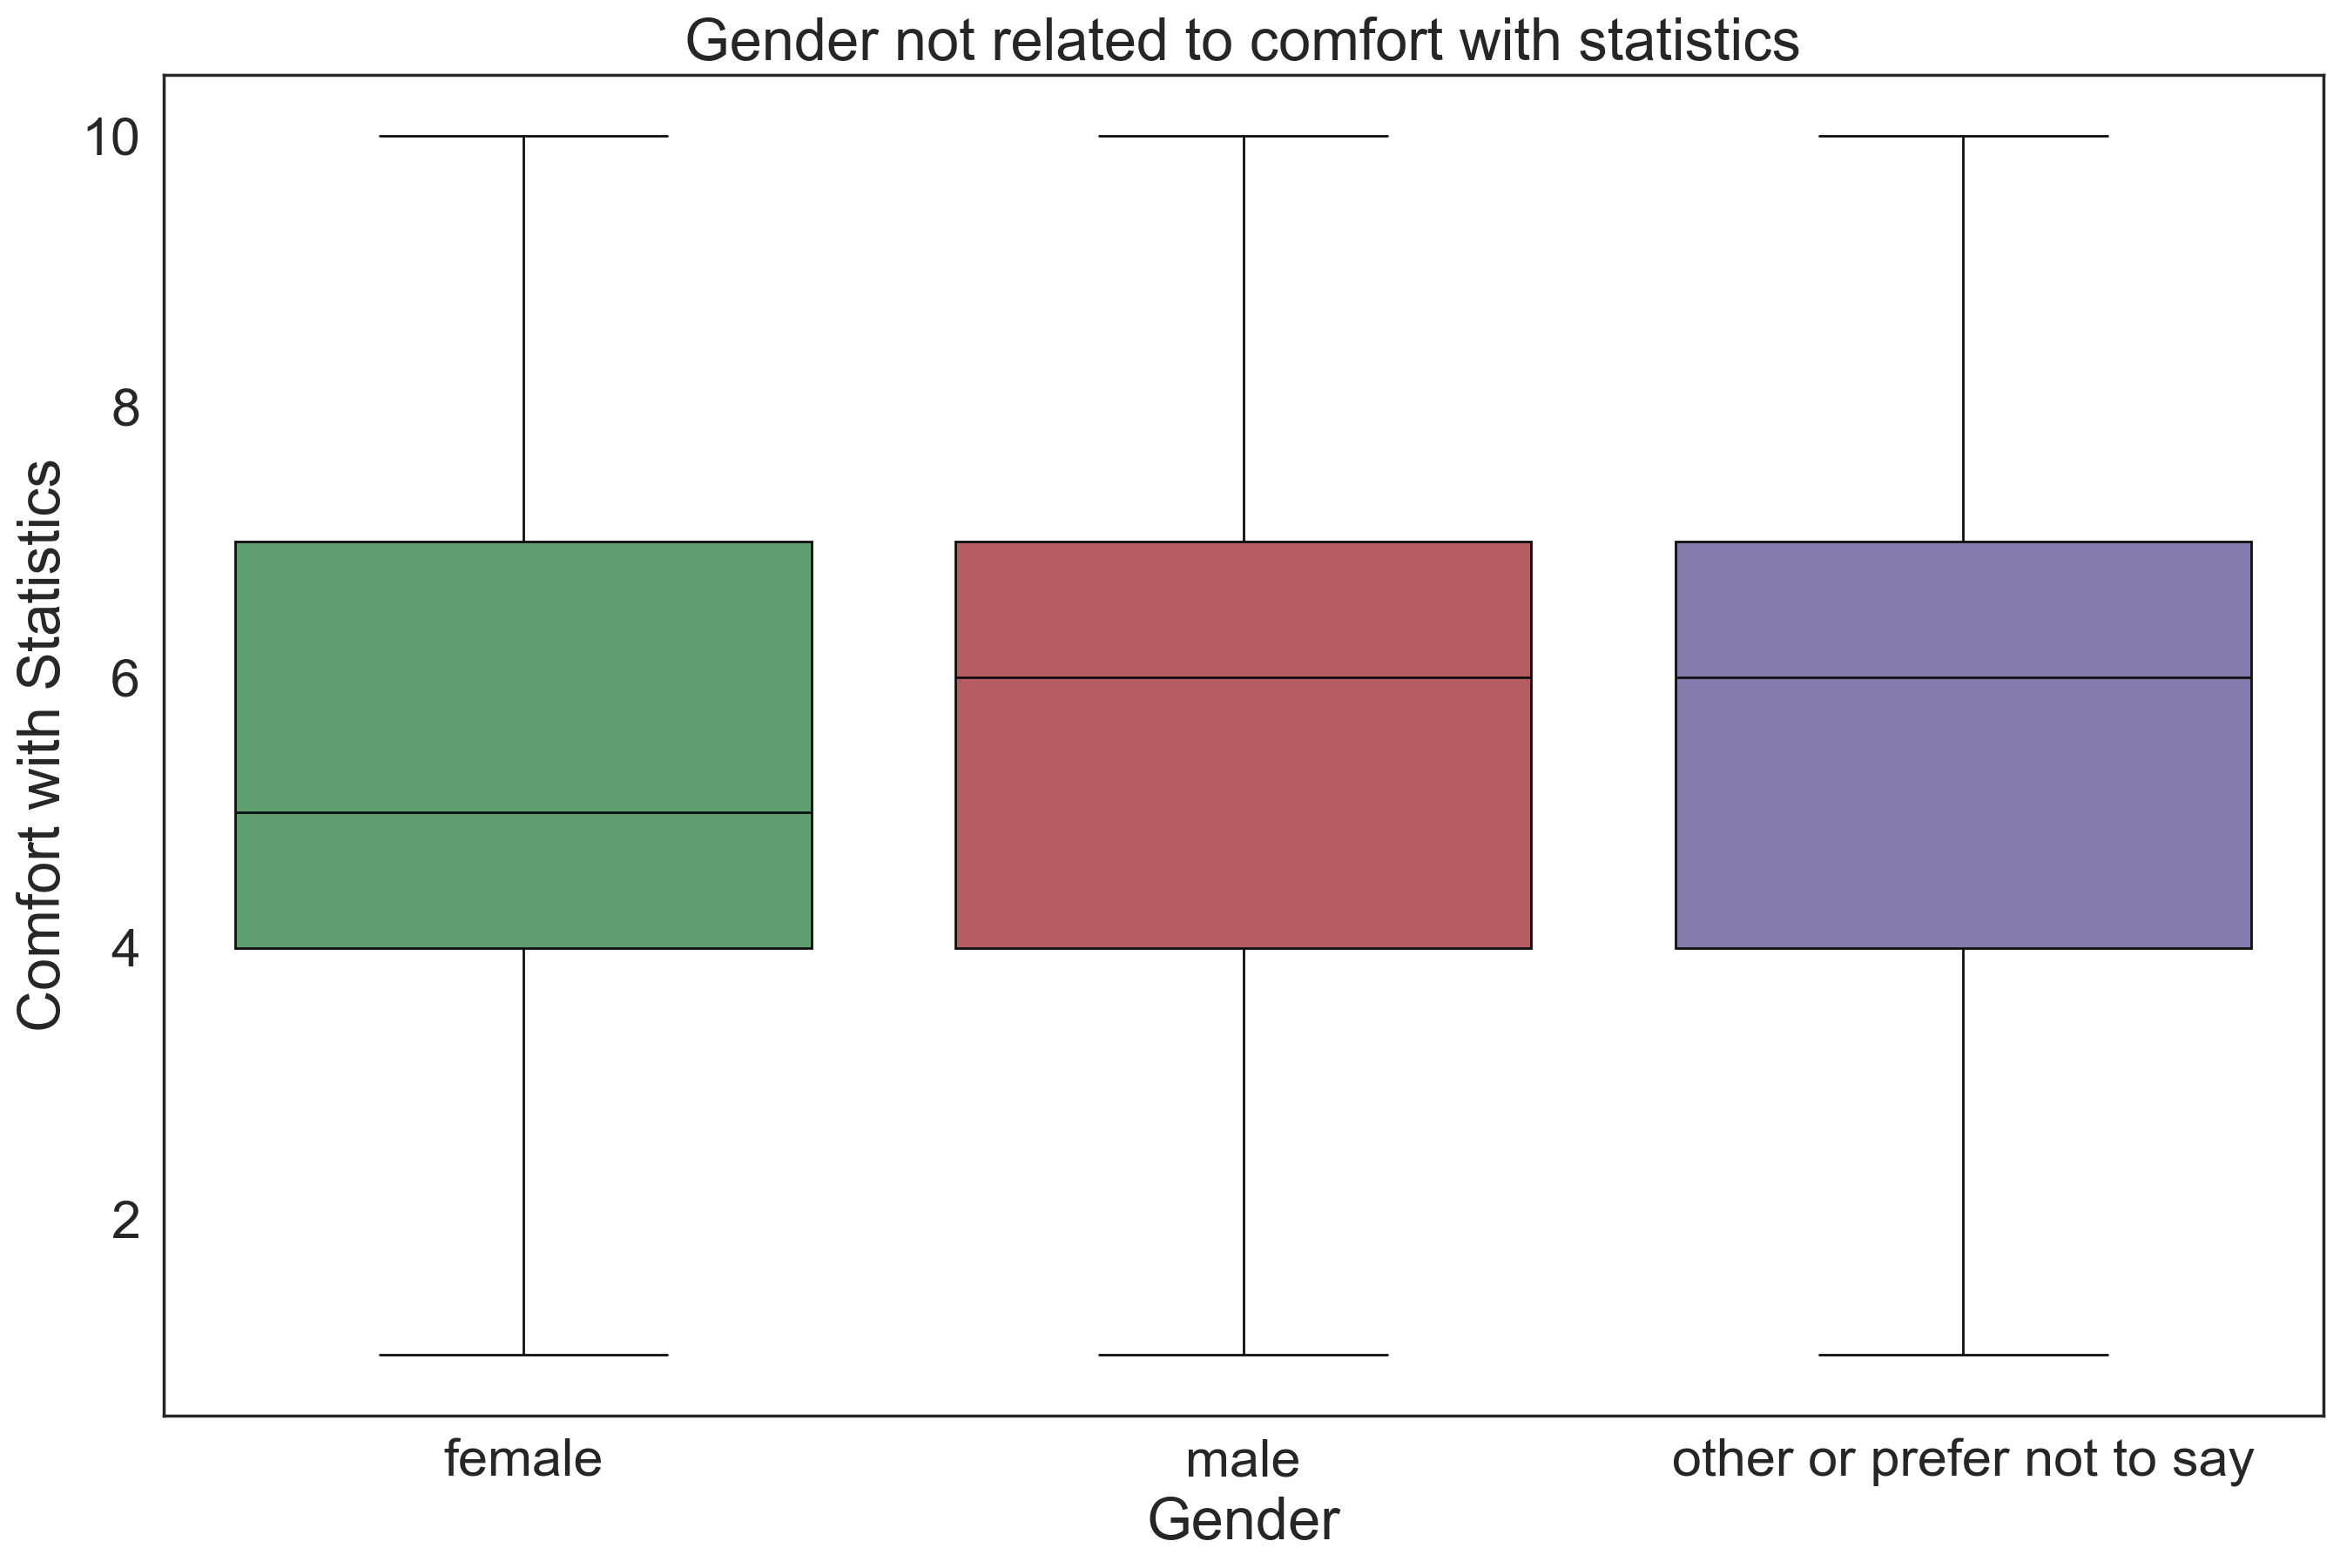

In [17]:
# generate boxplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(x='gender', y='statistics', data=df, palette=my_palette)

ax.set_title('Gender not related to comfort with statistics')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender')

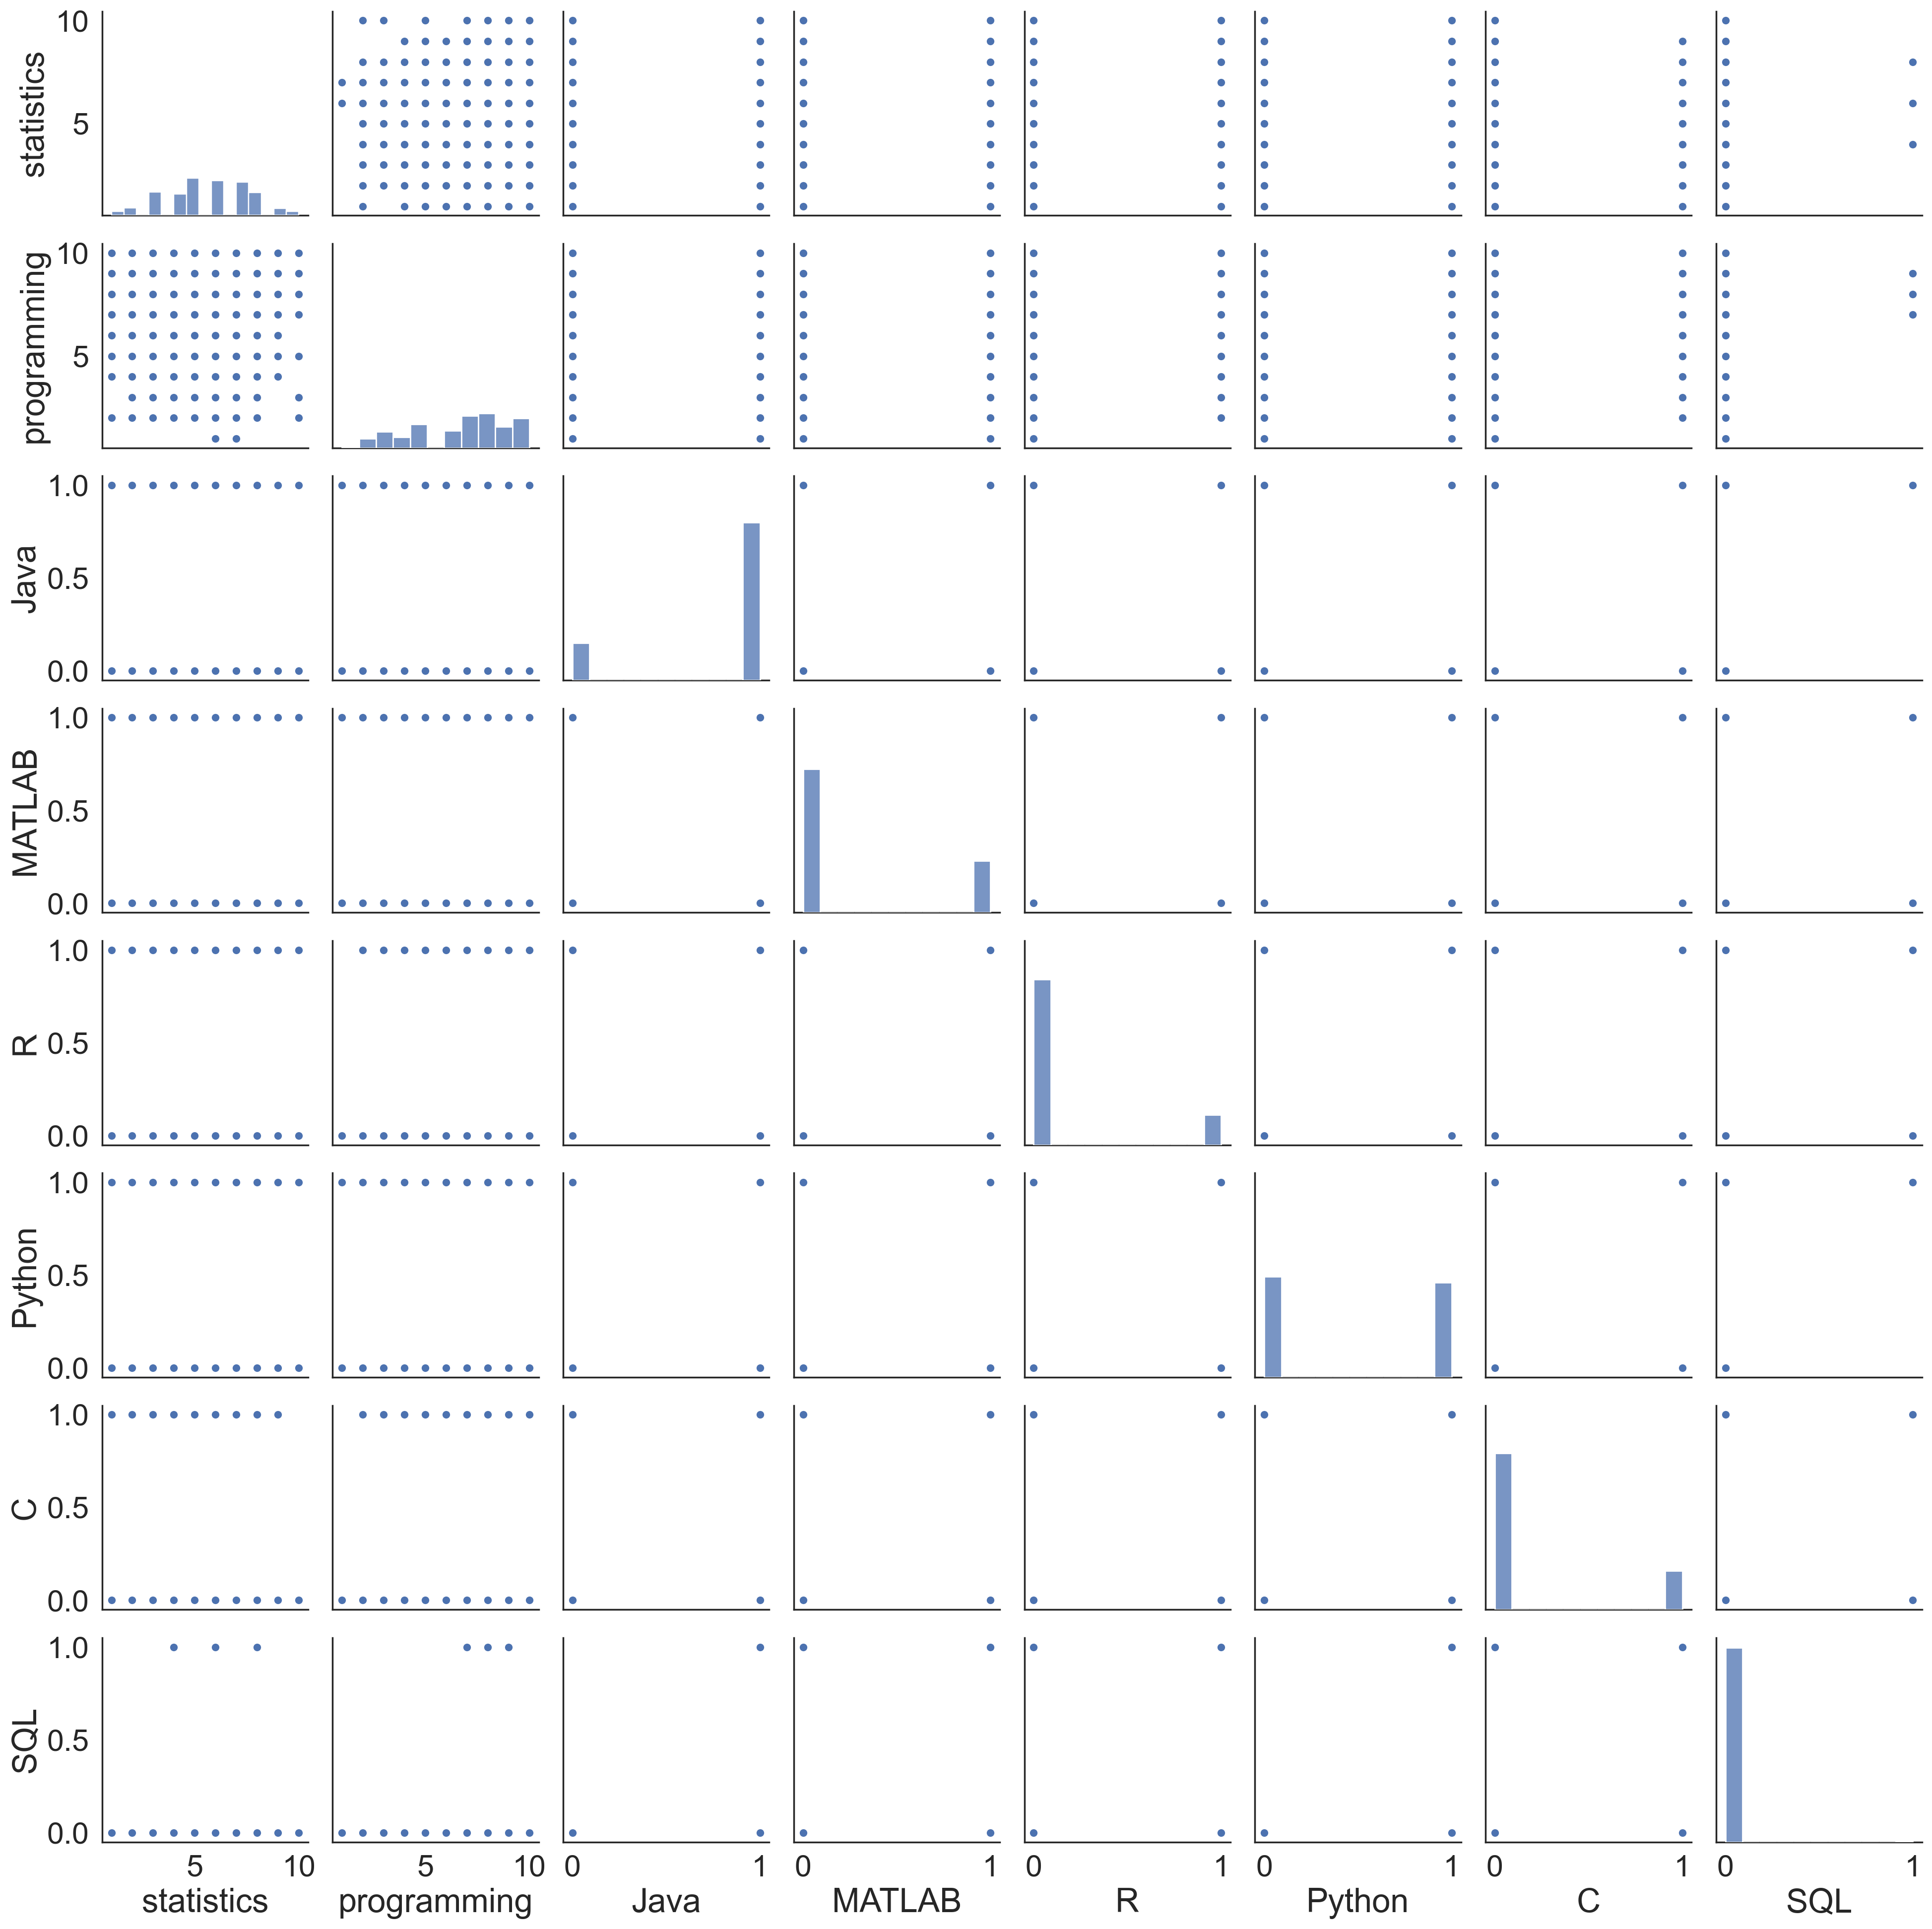

In [18]:
sns.pairplot(data=df)

<Axes: xlabel='statistics', ylabel='Count'>

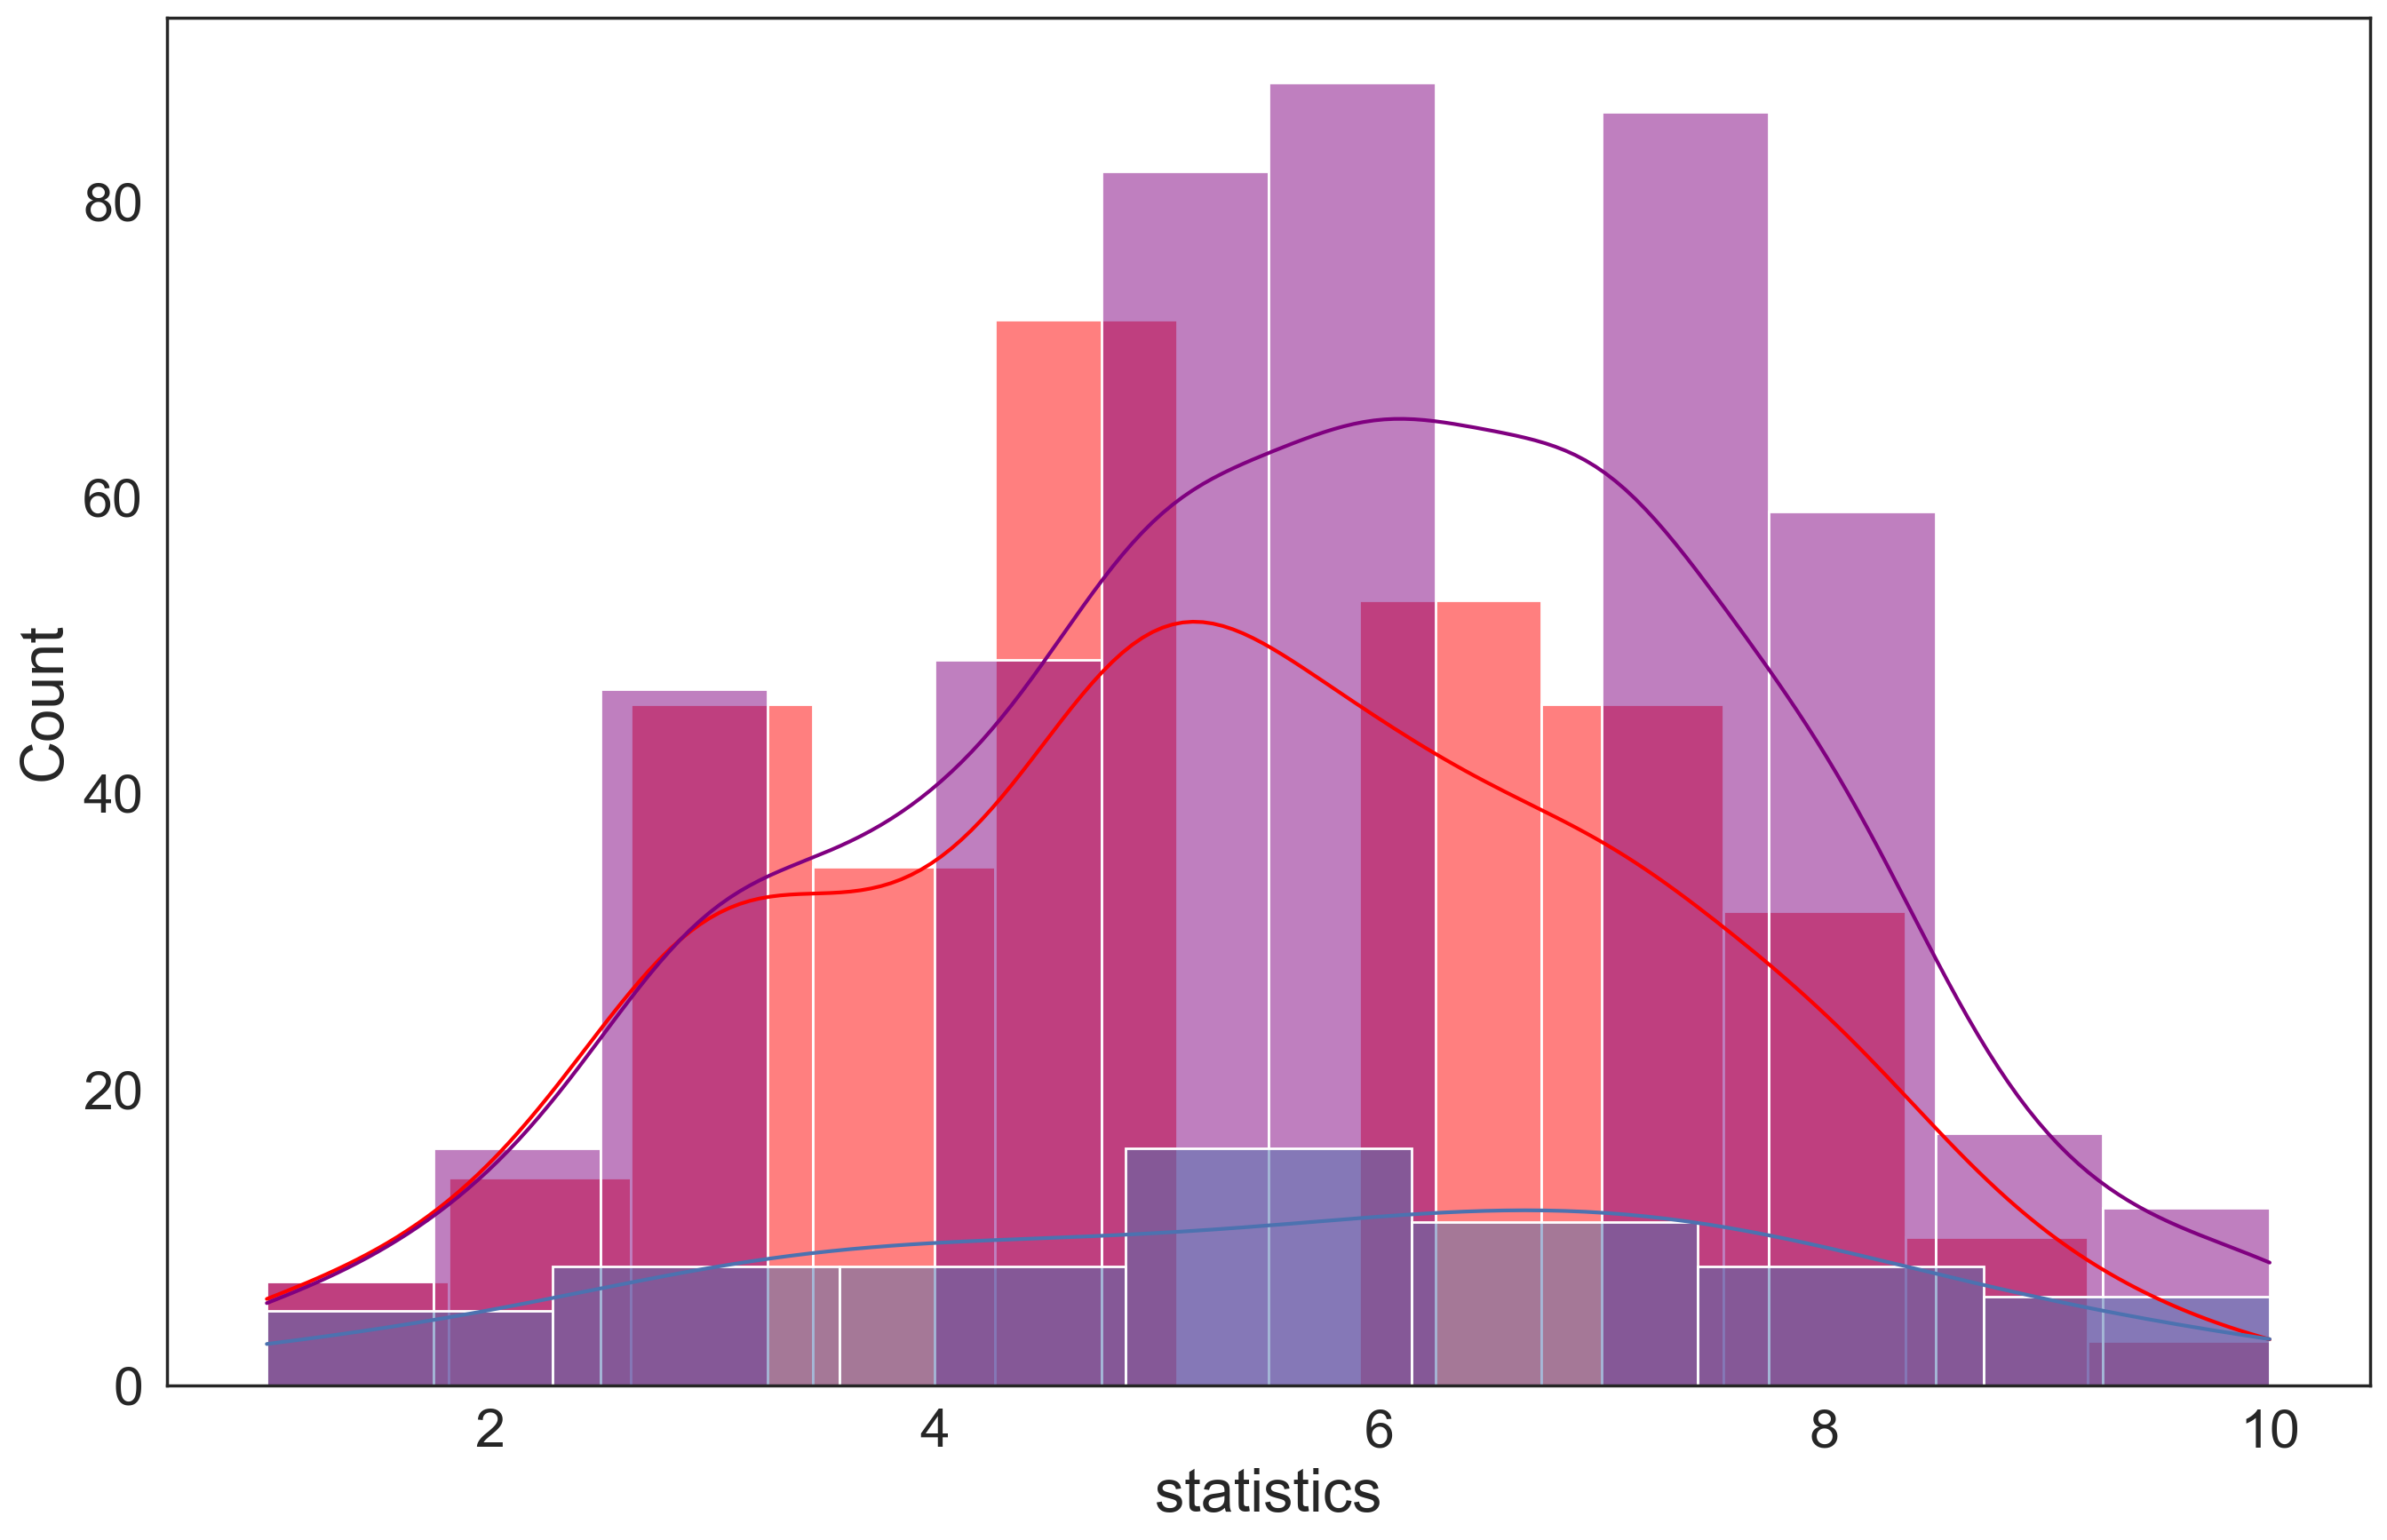

In [19]:
# Histograms (by a categorical variable). The same data plotted as a histogram are not so easily interpretable.
# `distplot` in older versions of `seaborn`
sns.histplot(df.loc[df['gender'] == 'female', 'statistics'], kde=True, color="red")
sns.histplot(df.loc[df['gender'] == 'male', 'statistics'], kde=True, color="purple")
sns.histplot(df.loc[df['gender'] == 'other or prefer not to say', 'statistics'], kde=True)